# CA 1 Data Visualisation

GITHUB: https://github.com/izazaka/Data
https://github.com/CCT-Dublin/data-visualisation-techniques-ca1-izazaka

Minimum Requirements  
  
Scenario:  
You have been retained by a retail company to analyse a dataset based on video games. This analysis will help determine the sales strategy for the company in their upcoming Winter season.    
Each answer MUST have a separate and different visualization that can be easily understood, visually represents the answer, and all data wrangling, analysis, and visualizations must be generated using python.   
The companies CTO also requires you to rationalize all the decisions that you have made in your Jupyter Notebook report.    
This rationalization MUST include your visualization design decisions, how you have engineered the data, feature selection and any other information that you deem relevant.   
  


Requirements  

You are required to use the dataset contained within the file “vgsales.csv” and then answer the following questions:  

Part 1: (Column Names are denoted by quotation marks)  [0-40]
What are the top 5 games by global sales?  
Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?  
What is the distribution of the most popular 4 game genres?  
Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  
What are the 3 most common “developer” in the dataset? 

Part 2   [0-10]
You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario.  
Part3:   [0-50] 
You must explain, in detail,    
why you chose the specific methods to engineer the data and how you achieved this in python (Part 1/Part 2)  
why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)  
what design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)  
what your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)    
Note that all written work MUST be completed in Jupyter Notebook Markdown (please review “Jupyter Notebook Tutorial” Notes in Moodle if you are unsure of this), NOT in code comments.
  
All Code must be included in code blocks (As normal). No other upload will be accepted.  
  


## COLOUR PALLET
#FD5551 RED
#8CB8EF BLUE
#F38BD6 PINK
#00D3C2 GREEN
#9F9D9E GRAY

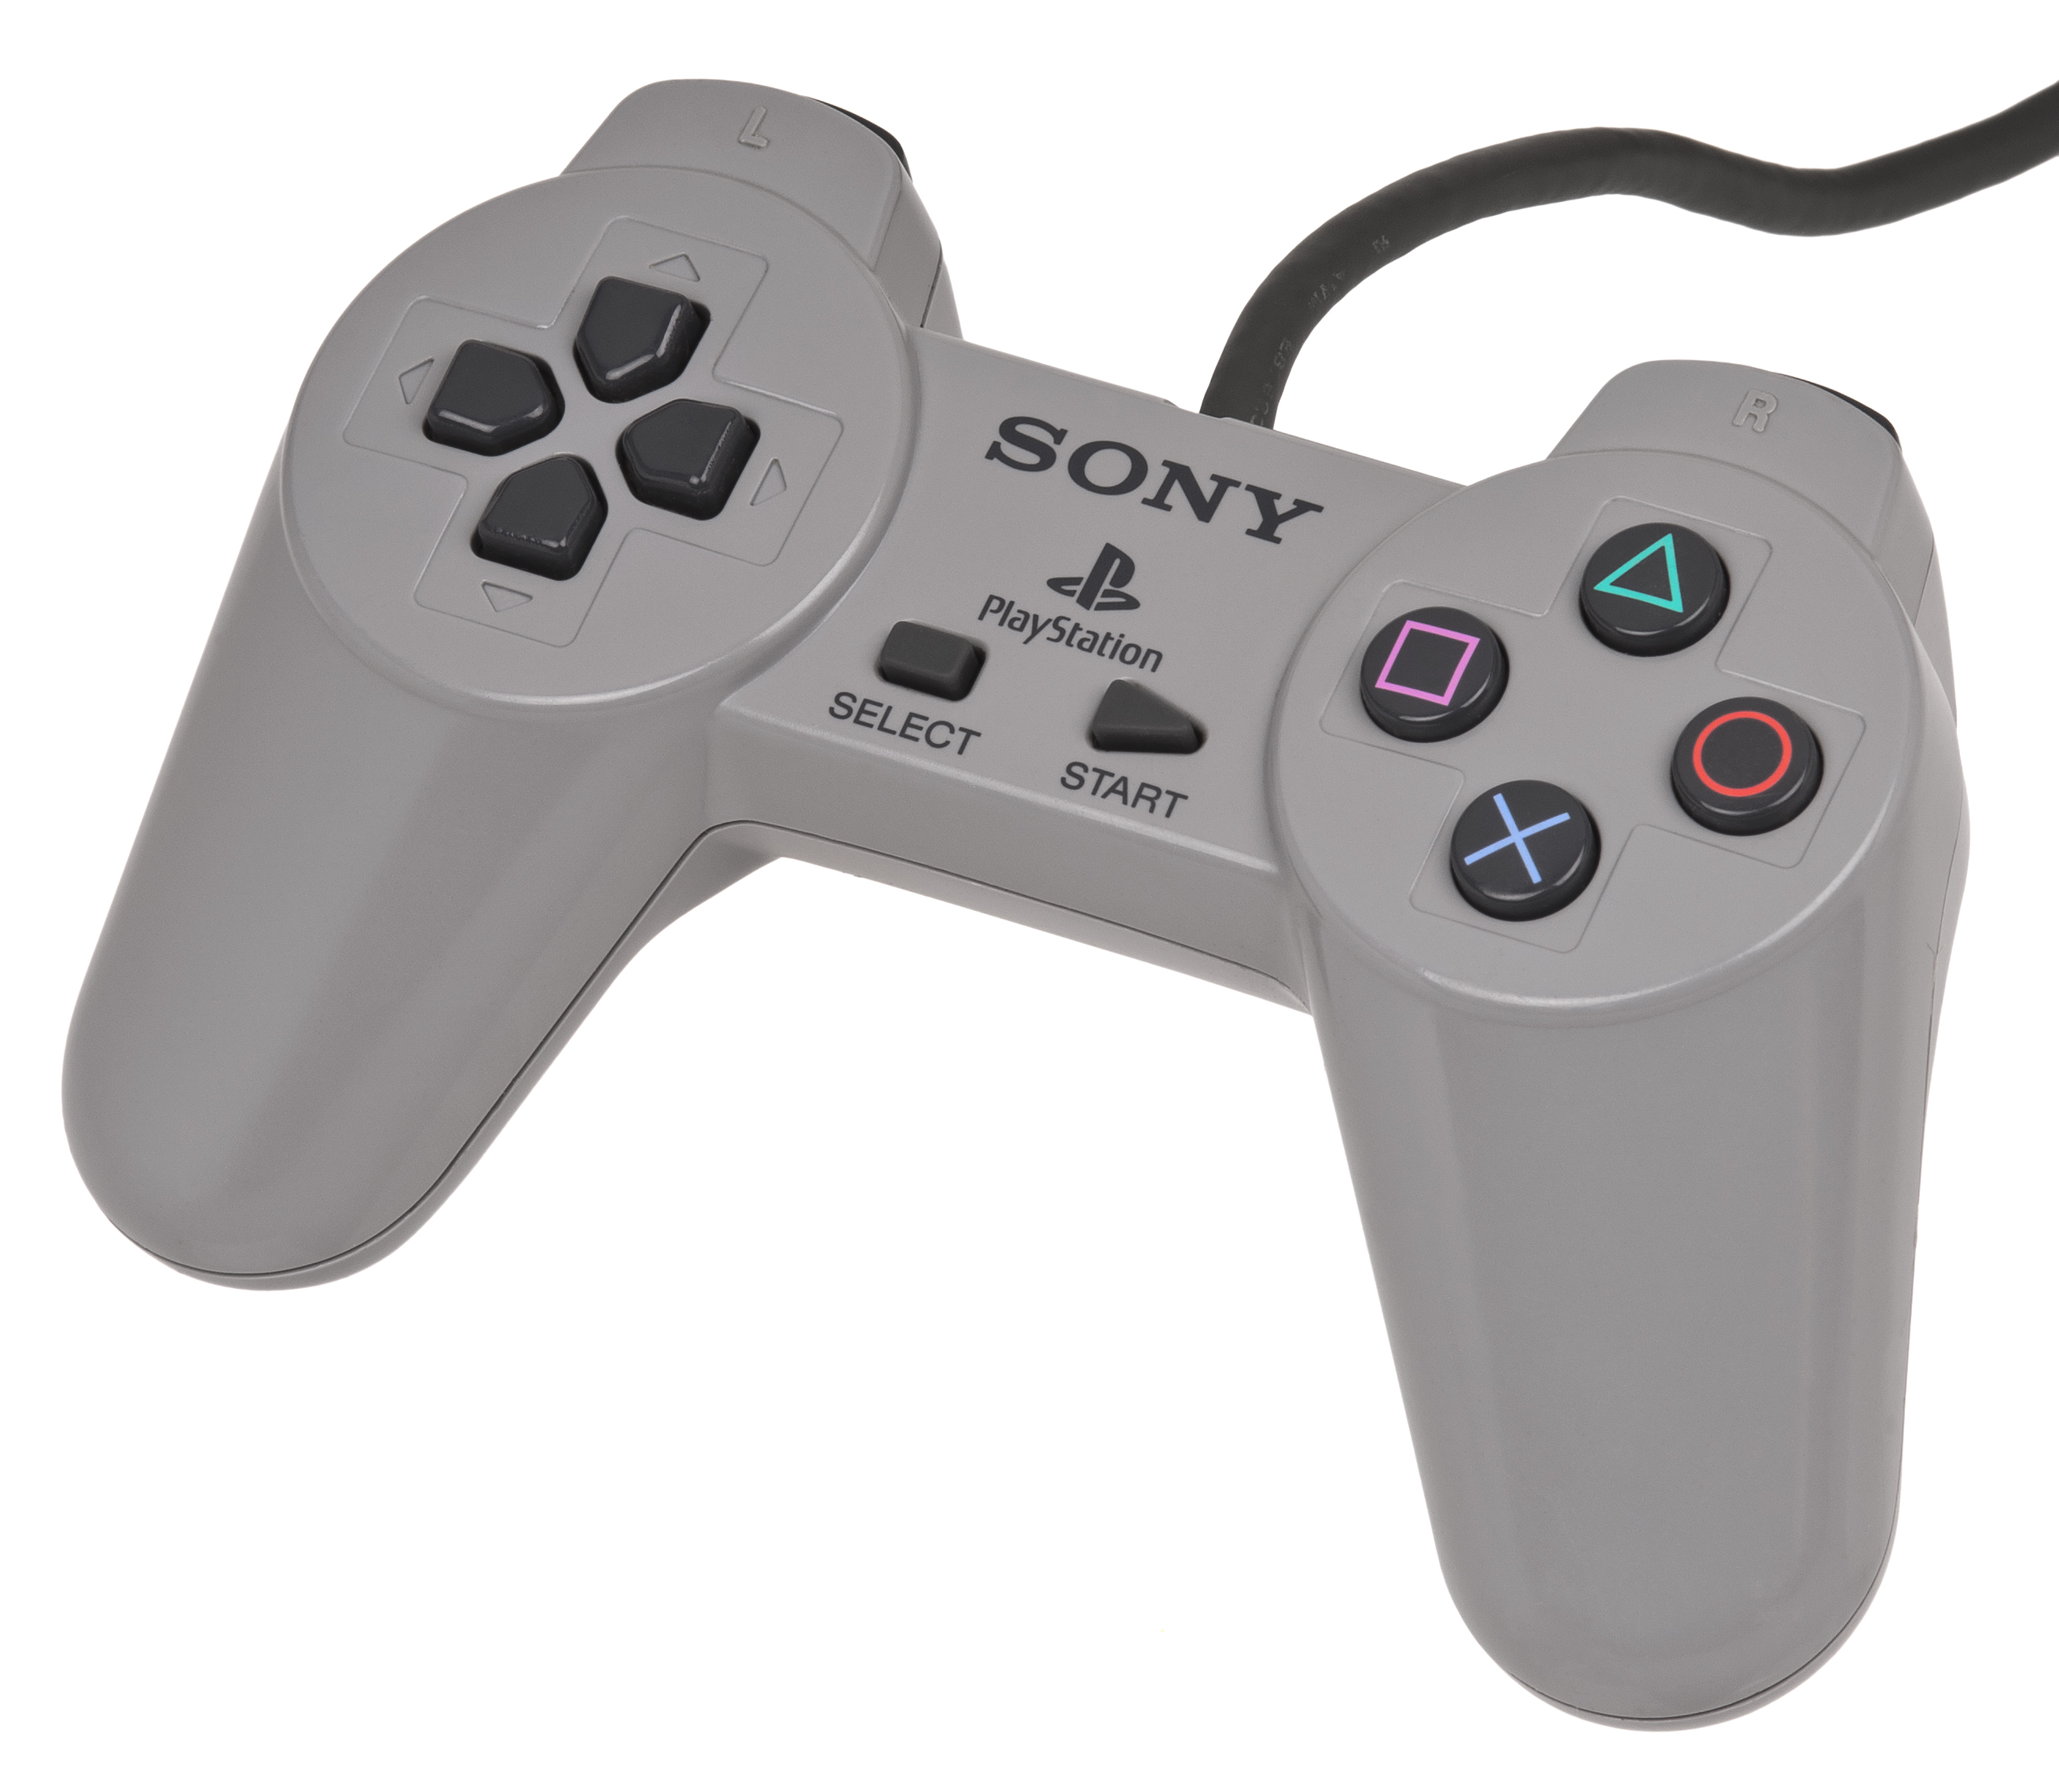

## Libraries

In [1]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

from scipy import stats

from sklearn.preprocessing import LabelEncoder

sns.set()

# EDA

The Exploratory Data Analysis (EDA) in our raw data is a crucial task that helps us understand the type of data we are dealing with and the necessary approaches to obtain satisfactory results not only in Machine Learning Algorithms but also in visualisations and probabilistic questions that we might need to answer. EDA was originally developed in 1970 by the American mathematician John Tukey (IBM, 2023) and consists of checking the characteristics of the dataset such as shape, size, type of features and observations, the presence or absence of missing or duplicated values, the distribution of the data, among others.

In [2]:
vg = pd.read_csv("vgsales.csv")

In [3]:
vg.head(3)

Name Platform  Year_of_Release     Genre Publisher  NA_Sales  \
0         Wii Sports      Wii           2006.0    Sports  Nintendo     41.36   
1  Super Mario Bros.      NES           1985.0  Platform  Nintendo     29.08   
2     Mario Kart Wii      Wii           2008.0    Racing  Nintendo     15.68   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
0     28.96      3.77         8.45         82.53          76.0          51.0   
1      3.58      6.81         0.77         40.24           NaN           NaN   
2     12.76      3.79         3.29         35.52          82.0          73.0   

  User_Score  User_Count Developer Rating  
0          8       322.0  Nintendo      E  
1        NaN         NaN       NaN    NaN  
2        8.3       709.0  Nintendo      E

In [4]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
vg.shape

(16719, 16)

In [6]:
vg.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Count  
count  16719.000000  16719.000000   8137.000000   8137.000000   7590.000000  
mean       0.047332      0.533543     68.967679     26.360821    162.229908  
std        0.186710      1.547935     13.938165     18.980495    561.282326  
min        0.000000      0.010000     13.000000      3.000000      4.000000  
25%        0.000000      0.060000     60.000000     12.000000     10.000000  
50%        0.010000      0.170000     71.000000     21.000000     24.000000  
75%        0.030000      0.470000     79.000000     36.000000     81.000000  
max       10.570000     82.530000     98.000000    113.000000  10665.000000

### Missing Values

To answer the five questions of the first part of this project we will need to analyse the following features:

- Global_Sales: the Global Sales of each videogame;
- NA_Sales: the North America Sales of each videogame;
- JP_Sales: the Japanese Sales of each videogame;
- Genre: type of game;
- Year_of_Release: the year of which each video game was released;
- EU_Sales: the European Sales of each videogame;
- Developer: the name of the Developer.



None of the sales columns have missing values. The "Genre" column has only 2 "NaN", "Year of Release'' 269 and "Developer" has the highest number totaling to 6623. The proportion of missing values for all columns is shown in Graphic 1. The colours were chosen based on the classic controller of the Playstation 1, with the hatch referring to the "circle button" and the blue lines to the "x button". Both buttons are typically used to confirm choices. The threshold of 40% was chosen to highlight the proportion of missing values in the column "Developer" that will be used on the fifth question. 


Each of the three columns containing missing values was analysed separately in order to determine the best approach in dealing with them. In the first case (Genre), the idea was to manually  impute the missing values by searching the names of the video games on the Internet. However, the rows containing missing values are the same for the columns "Genre" and "Name" which makes the strategy impractical. As these rows only represent 0.011962% of the total, there will not be a significant statistical loss by dropping them. 


As for the "Year of Release'' the missing values represent 1.608948% of the total. The mode is the year of 2008 with 1427 observations followed by 2009 with 1426. At first I thought to impute the missing values not with the mode but randomly distributed them into the seven years with the 50% of the observations (2008, 2009, 2010, 2007, 2011, 2006 and 2005) so the distribution would not be as impacted as if I had just used the mode. 

I decided to drop the rows with "NaN" after plotting Graphic 2, which lead to the observation that from our range (1980 - 2020) two years did not have any observations (2018 and 2019) which might explain the missing values. A quick consultation on the IMDb (IMDb, 2018) website shows a total of 1498 and 1551 releases for those two years respectively. Once it is not possible to know the reason why these values are missing and the proportion is low I also decided to drop them.

The scenario changes when the column "Developer" is analysed. The answer of the fifth question might change depending on the strategy chosen due the high amount of missing values (39.613613%). The Graphic 3 shows the distributions of four performed experiments:

- The original data with and without the missing values;
- The imputation using the mode of the groups according to the "Publisher" column;
- The imputation using the mode of the groups according to the "Platform" column;
- The imputation using the mode of the groups according to the combination of both columns.


The idea is to minimise the impact on the distribution by imputting a meaningful and diverse range of variables instead of relying just on the unique value of the mode. Firstly, I selected the column "Publisher" to group the dataset and replace the missing values on the Developer column based on the mode within each group. In case there was no mode or all the values were NaN within the group, the returned value would be "Unknown". The same was performed with the feature "Platform". 

Among all the features on the dataset those two would be the logical ones as Publishers and Developers work closely to launch new games in exclusively platforms or in a range of them (Zegarra, 2020). Platform is the place where the game is played, while the Publisher is responsible for distributing, finacing and marketing and finally, the developer is the creative part. In many cases, there is overlap between the responsibilities of publishers and developers. Another common practice in the industry is the merger of development and publishing in one large organisation. 


The number of "Unknown" values were 707 in the first scenario and of 1099 in the second using "Platform". Both results were still unsatisfactory; once "Unknown" and "NaN'' would have the same statistical value, they would be both missing values. The strategy to overcome this problem was to combine both features, first the imputation would occur with "Publisher" and the "Unknown" resulting values of this will be replaced by the mode of the groups using the feature "Platform". The outcome was a new feature with neither "NaN'' nor "Unknown" values. 



In [7]:
vg.replace("missing_value", pd.NA, inplace = True)

In [8]:
vg["Genre"].mode()

0    Action
Name: Genre, dtype: object

In [9]:
print(vg.iloc[vg[vg['Genre'].isnull()].index])

      Name Platform  Year_of_Release Genre              Publisher  NA_Sales  \
659    NaN      GEN           1993.0   NaN  Acclaim Entertainment      1.78   
14246  NaN      GEN           1993.0   NaN  Acclaim Entertainment      0.00   

       EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
659        0.53      0.00         0.08          2.39           NaN   
14246      0.00      0.03         0.00          0.03           NaN   

       Critic_Count User_Score  User_Count Developer Rating  
659             NaN        NaN         NaN       NaN    NaN  
14246           NaN        NaN         NaN       NaN    NaN  


In [10]:
vg.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [11]:
isnull = vg.isnull().sum()

nperc = pd.DataFrame((isnull / (len(vg))) * 100)

nperc.columns = ["% of NaN"]

nperc.head(20)

% of NaN
Name              0.011962
Platform          0.000000
Year_of_Release   1.608948
Genre             0.011962
Publisher         0.322986
NA_Sales          0.000000
EU_Sales          0.000000
JP_Sales          0.000000
Other_Sales       0.000000
Global_Sales      0.000000
Critic_Score     51.330821
Critic_Count     51.330821
User_Score       40.098092
User_Count       54.602548
Developer        39.613613
Rating           40.486871

### Graphic 1 - Proportion of Missing Values

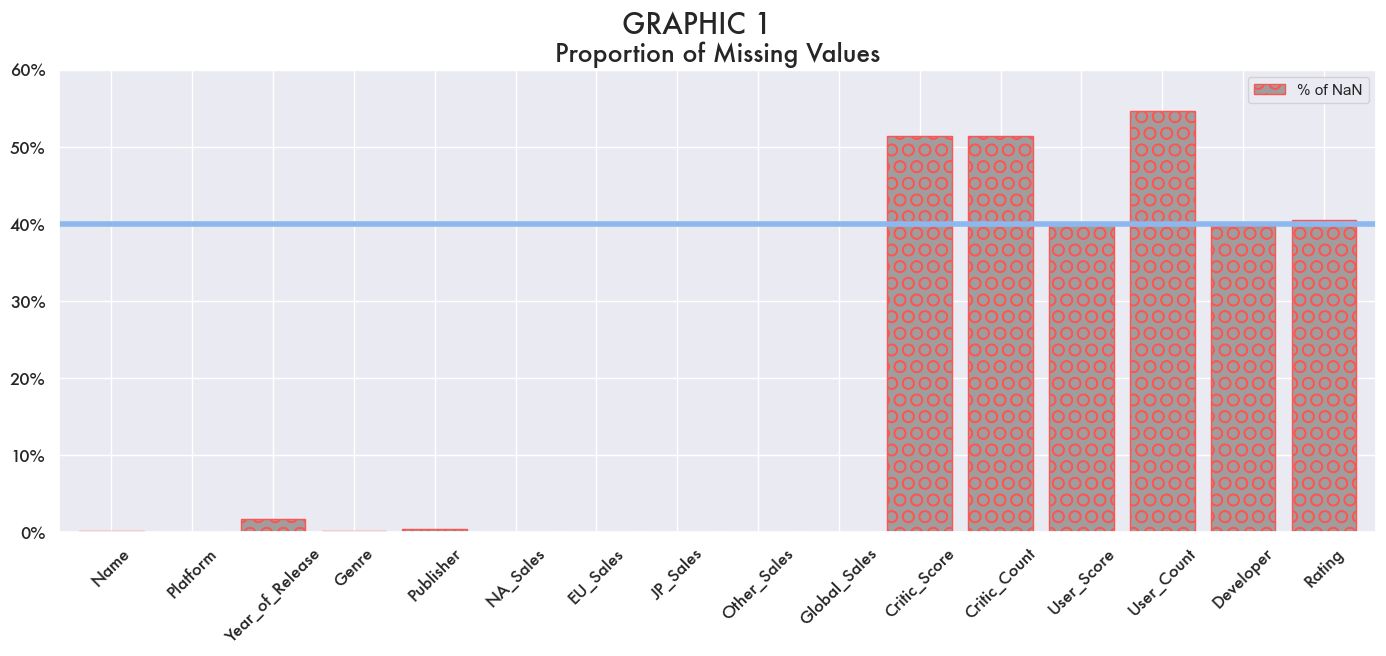

In [12]:
nperc.plot(kind = "bar", color = "#9F9D9E", figsize = (17,6),
          width = 0.8, edgecolor = "#FD5551", hatch = "O", 
          linestyle = "-")

plt.axhline(y = 40, linewidth = 4, color = "#8CB8EF", 
           linestyle = "-")


plt.suptitle("GRAPHIC 1", font = "Futura", fontsize = 20)
plt.title("Proportion of Missing Values", font = "Futura", fontsize = 18)

plt.yticks(ticks = plt.yticks()[0], labels=[f"{int(tick)}%" for tick in plt.yticks()[0]], font = "Futura")
plt.xticks(rotation = 45, font = "Futura");

In [13]:
vg.dropna(subset = ["Year_of_Release"], inplace = True)

In [14]:
vg['Year_of_Release'] = vg['Year_of_Release'].astype(int)

### Graphic 2 - Number of Variables by Year of Release

The bars on the vertical make it easier to read the years and the aspect 2 fits the plot on the markdown so we can see all the years.

In this plot it is possible to see the mode 2018 (has one more missing value than 2009), and the years that do not have any observatios (2018 and 2019) in our range (1980 - 2020).

The colors were chosen based on the controller from the PlayStation 1. 

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

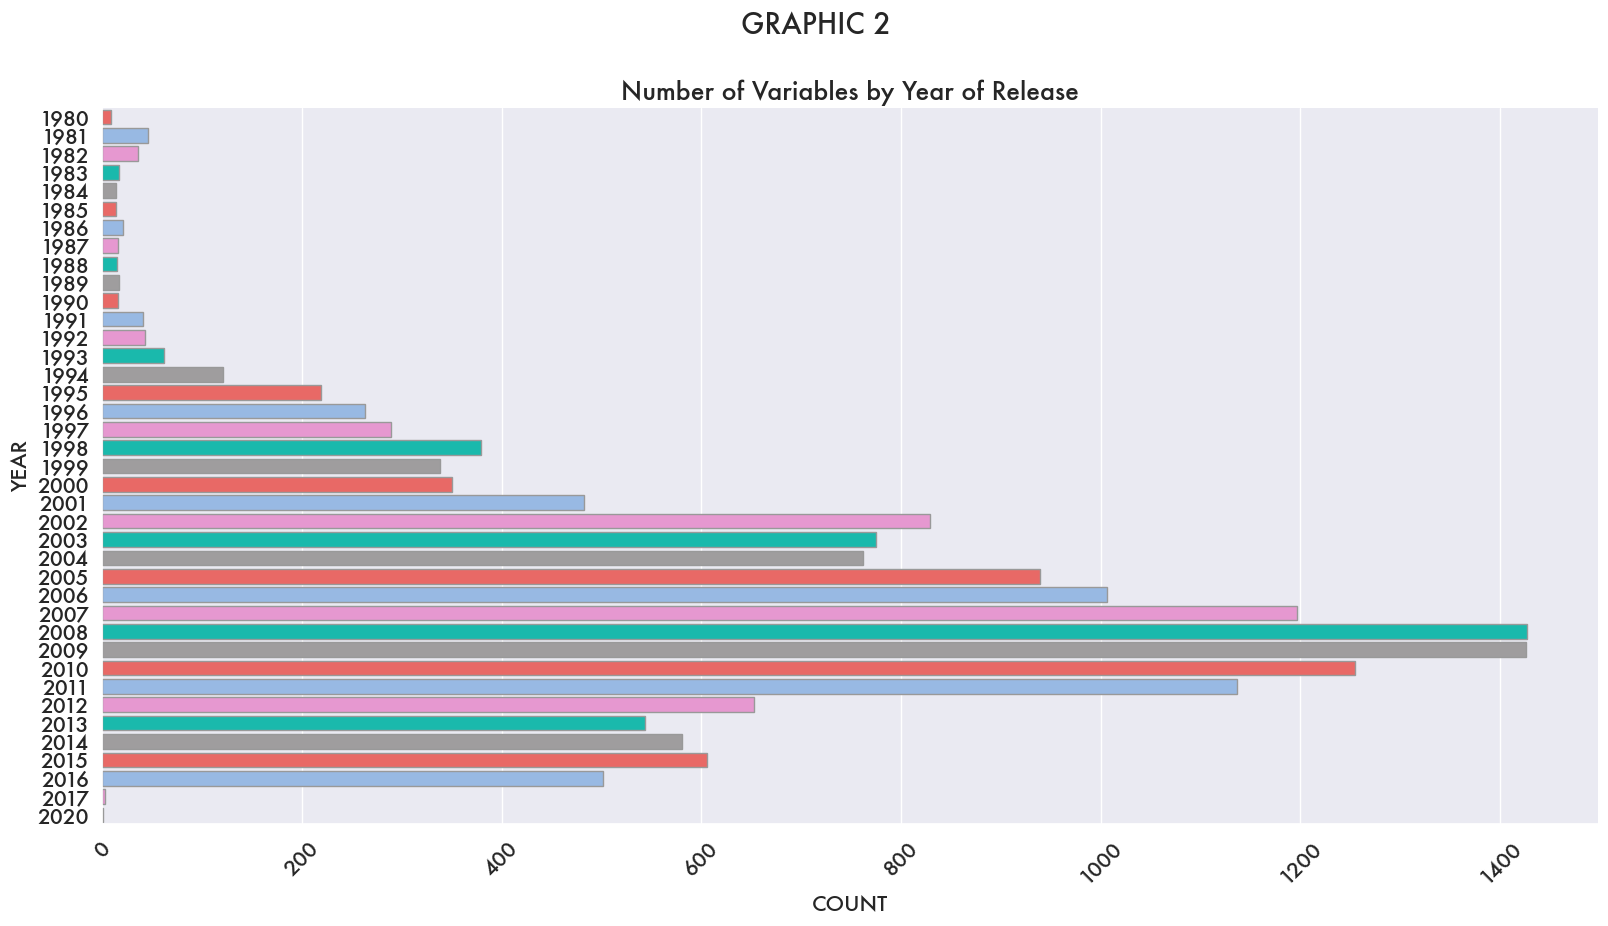

In [15]:
plt.figure(figsize = (20, 10))

sns.catplot(data = vg, y = "Year_of_Release", kind = "count", 
            palette = ["#FD5551", "#8CB8EF", "#F38BD6", "#00D3C2", "#9F9D9E"], 
            edgecolor = "0.6", height = 8, aspect = 2)

plt.title("Number of Variables by Year of Release", y = 1, font = "Futura", fontsize = 18)
plt.suptitle("GRAPHIC 2", y = 1.1, font = "Futura", fontsize = 20)
plt.xlabel("COUNT", font = "Futura", fontsize = 15)
plt.ylabel("YEAR", font = "Futura", fontsize = 15)

plt.yticks(font = "Futura", fontsize = 15)
plt.xticks(rotation = 45, font = "Futura", fontsize = 15)
plt.grid(axis = "x", linestyle = "-", alpha = 1)  

plt.show()

In [16]:
vg["Year_of_Release"].value_counts()

Year_of_Release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: count, dtype: int64

In [17]:
vg.tail(1)

Name Platform  Year_of_Release       Genre   Publisher  \
16718  Winning Post 8 2016      PSV             2016  Simulation  Tecmo Koei   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
16718       0.0       0.0      0.01          0.0          0.01           NaN   

       Critic_Count User_Score  User_Count Developer Rating  
16718           NaN        NaN         NaN       NaN    NaN

### Imputing with the Mode

In [18]:
vg["Developer_M"] = vg["Developer"].fillna(vg["Developer"].mode()[0])

In [19]:
vg["Developer"].mode()

0    Ubisoft
Name: Developer, dtype: object

In [20]:
vg["Developer"].nunique()

1680

In [21]:
vg["Developer"].unique()

array(['Nintendo', nan, 'Good Science Studio', ..., 'Big Red Software',
       'Atomic Games', 'Interchannel-Holon'], dtype=object)

### Imputing by Publisher

In [22]:
vg["Developer_P"] = vg.groupby("Publisher")["Developer"].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "Unknown"))

vg.head(1)

Name Platform  Year_of_Release   Genre Publisher  NA_Sales  EU_Sales  \
0  Wii Sports      Wii             2006  Sports  Nintendo     41.36     28.96   

   JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count User_Score  \
0      3.77         8.45         82.53          76.0          51.0          8   

   User_Count Developer Rating Developer_M Developer_P  
0       322.0  Nintendo      E    Nintendo    Nintendo

In [23]:
vg[["Publisher", "Developer", "Developer_P"]].tail(1)

Publisher Developer  Developer_P
16718  Tecmo Koei       NaN  Omega Force

In [24]:
mostP = vg["Developer_P"].value_counts()[vg["Developer_P"].value_counts() > vg["Developer"].value_counts().max()]
mostP.head(20)

Developer_P
Unknown                   707
Namco                     683
Konami                    604
Nintendo                  459
EA Sports                 385
SCEA San Diego Studios    346
Ubisoft                   346
Sega                      345
Capcom                    340
Activision                290
Omega Force               269
THQ                       253
Name: count, dtype: int64

In [25]:
difference = vg["Developer_P"].value_counts() - vg["Developer"].value_counts().max()
difference.head()

Developer_P
Unknown      506
Namco        482
Konami       403
Nintendo     258
EA Sports    184
Name: count, dtype: int64

### Imputing by Platform

In [26]:
vg["Developer_PP"] = vg.groupby("Platform")["Developer"].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "Unknown"))

In [27]:
vg[["Publisher", "Developer", "Developer_P", "Developer_PP"]].head(1)

Publisher Developer Developer_P Developer_PP
0  Nintendo  Nintendo    Nintendo     Nintendo

In [28]:
mostPP = vg["Developer_PP"].value_counts()[vg["Developer_PP"].value_counts() > vg["Developer"].value_counts().max()]
mostPP.head(10)

Developer_PP
EA Canada            1369
Ubisoft              1363
EA Sports            1186
Capcom               1118
Unknown              1099
Nintendo              396
Vicarious Visions     371
TT Games              347
Name: count, dtype: int64

### Combining and Imputing 

In [29]:
P = vg.groupby("Publisher")["Developer"].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

PP = vg.groupby("Platform")["Developer"].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

vg["Developer_C"] = P.combine_first(PP)

vg.tail(1)

Name Platform  Year_of_Release       Genre   Publisher  \
16718  Winning Post 8 2016      PSV             2016  Simulation  Tecmo Koei   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
16718       0.0       0.0      0.01          0.0          0.01           NaN   

       Critic_Count User_Score  User_Count Developer Rating Developer_M  \
16718           NaN        NaN         NaN       NaN    NaN     Ubisoft   

       Developer_P Developer_PP  Developer_C  
16718  Omega Force     TT Games  Omega Force

In [39]:
combined = vg["Developer_C"].value_counts()[vg["Developer_C"].value_counts() > vg["Developer"].value_counts().max()]
combined.head(20)

Developer_C
Namco                     683
Konami                    604
Nintendo                  494
EA Sports                 486
Capcom                    475
Ubisoft                   416
SCEA San Diego Studios    346
Sega                      345
EA Canada                 296
Activision                290
Omega Force               269
THQ                       253
Name: count, dtype: int64

In [40]:
dist1 = pd.DataFrame(vg["Developer"].dropna())
dist2 = pd.DataFrame(vg[vg["Developer_P"] != "Unknown"])
dist3 = pd.DataFrame(vg[vg["Developer_PP"] != "Unknown"])
dist4 = pd.DataFrame(vg[vg["Developer_C"] != "Unknown"])

In [41]:
dist3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15351 entries, 0 to 16718
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             15351 non-null  object 
 1   Platform         15351 non-null  object 
 2   Year_of_Release  15351 non-null  int64  
 3   Genre            15351 non-null  object 
 4   Publisher        15319 non-null  object 
 5   NA_Sales         15351 non-null  float64
 6   EU_Sales         15351 non-null  float64
 7   JP_Sales         15351 non-null  float64
 8   Other_Sales      15351 non-null  float64
 9   Global_Sales     15351 non-null  float64
 10  Critic_Score     7983 non-null   float64
 11  Critic_Count     7983 non-null   float64
 12  User_Score       9840 non-null   object 
 13  User_Count       7463 non-null   float64
 14  Developer        9907 non-null   object 
 15  Rating           9769 non-null   object 
 16  Developer_P      15319 non-null  object 
 17  Developer_PP     

In [42]:
dist2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15743 entries, 0 to 16718
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             15741 non-null  object 
 1   Platform         15743 non-null  object 
 2   Year_of_Release  15743 non-null  int64  
 3   Genre            15741 non-null  object 
 4   Publisher        15711 non-null  object 
 5   NA_Sales         15743 non-null  float64
 6   EU_Sales         15743 non-null  float64
 7   JP_Sales         15743 non-null  float64
 8   Other_Sales      15743 non-null  float64
 9   Global_Sales     15743 non-null  float64
 10  Critic_Score     7983 non-null   float64
 11  Critic_Count     7983 non-null   float64
 12  User_Score       9839 non-null   object 
 13  User_Count       7463 non-null   float64
 14  Developer        9907 non-null   object 
 15  Rating           9769 non-null   object 
 16  Developer_P      15711 non-null  object 
 17  Developer_PP     

In [220]:
encoder = LabelEncoder()

dist1["Original_NM"] = encoder.fit_transform(dist1["Developer"])
dist2["Developer_P_NM"] = encoder.fit_transform(dist2["Developer_P"])
dist3["Developer_PP_NM"] = encoder.fit_transform(dist3["Developer_PP"])
dist4["Developer_C"] = encoder.fit_transform(dist4["Developer_C"])



vg["Developer_P_E"] = encoder.fit_transform(vg["Developer_P"])
vg["Developer_PP_E"] = encoder.fit_transform(vg["Developer_PP"])
vg["Developer_OE"] = encoder.fit_transform(vg["Developer"])
vg["Developer_C_E"] = encoder.fit_transform(vg["Developer_C"])
vg["Developer_M_E"] = encoder.fit_transform(vg["Developer_M"])

### Figure 1 - Distributions

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

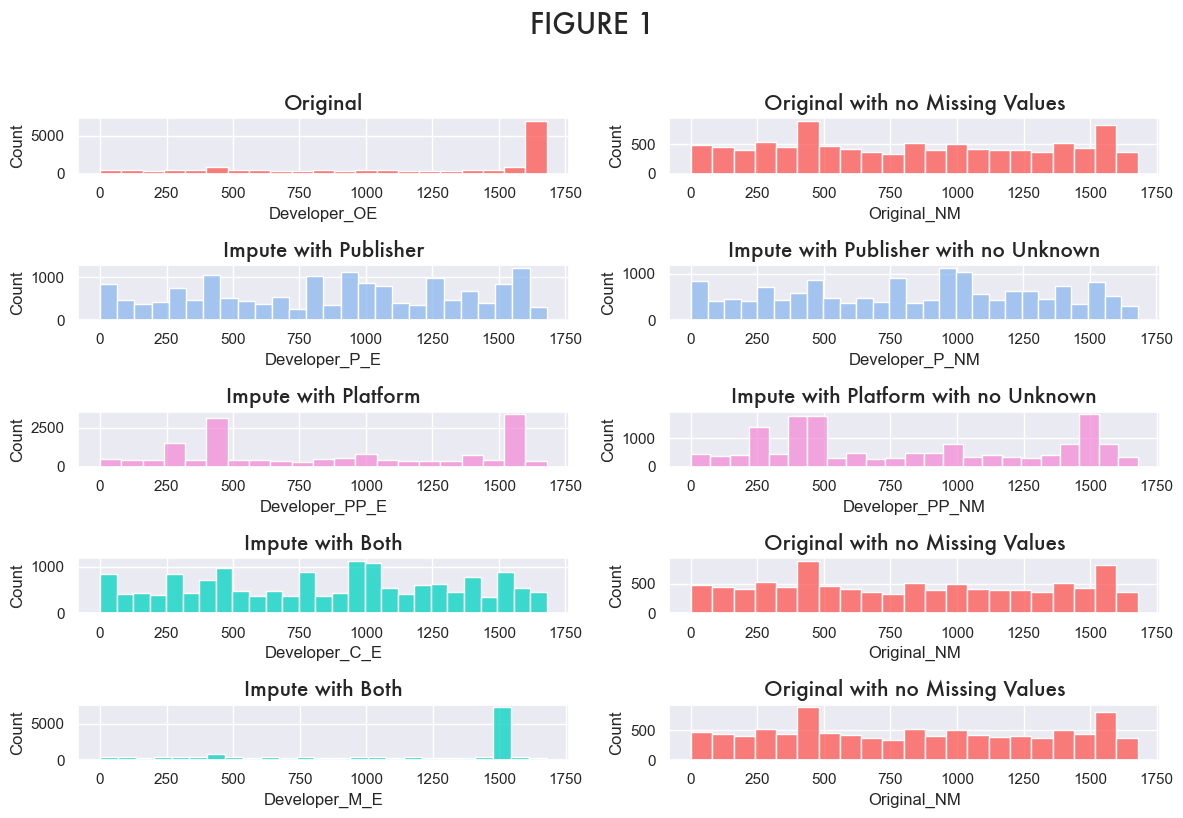

In [222]:
fig, axes = plt.subplots(5, 2, figsize = (12, 8))



sns.histplot(data = vg, x = "Developer_OE", ax = axes[0, 0], color = "#FD5551")
axes[0, 0].set_title("Original", font = "Futura", fontsize = 15)

sns.histplot(data = dist1, x = "Original_NM", ax = axes[0, 1], color = "#FD5551")
axes[0, 1].set_title("Original with no Missing Values", font = "Futura", fontsize = 15)


sns.histplot(data = vg, x = "Developer_P_E", ax = axes[1, 0], color = "#8CB8EF")
axes[1, 0].set_title("Impute with Publisher", font = "Futura", fontsize = 15)

sns.histplot(data = dist2, x = "Developer_P_NM", ax = axes[1, 1], color = "#8CB8EF")
axes[1, 1].set_title("Impute with Publisher with no Unknown", font = "Futura", fontsize = 15)


sns.histplot(data = vg, x = "Developer_PP_E", ax = axes[2, 0], color = "#F38BD6")
axes[2, 0].set_title("Impute with Platform", font = "Futura", fontsize = 15)

sns.histplot(data = dist3, x = "Developer_PP_NM", ax = axes[2, 1], color = "#F38BD6")
axes[2, 1].set_title("Impute with Platform with no Unknown", font = "Futura", fontsize = 15)


sns.histplot(data = vg, x = "Developer_C_E", ax = axes[3, 0], color = "#00D3C2")
axes[3, 0].set_title("Impute with Both", font = "Futura", fontsize = 15)

sns.histplot(data = dist1, x = "Original_NM", ax = axes[3, 1], color = "#FD5551")
axes[3, 1].set_title("Original with no Missing Values", font = "Futura", fontsize = 15)

sns.histplot(data = vg, x = "Developer_M_E", ax = axes[4, 0], color = "#00D3C2")
axes[4, 0].set_title("Impute with Both", font = "Futura", fontsize = 15)

sns.histplot(data = dist1, x = "Original_NM", ax = axes[4, 1], color = "#FD5551")
axes[4, 1].set_title("Original with no Missing Values", font = "Futura", fontsize = 15)

#plt.yticks(font = "Futura", fontsize = 12)
#plt.xticks(font = "Futura", fontsize = 12)

fig.suptitle("FIGURE 1", y = 1.02, font = "Futura", fontsize = 20)

plt.tight_layout()

On Figure 1 we have one the right side the distributions of the original data and the three imputation experiments with the presence of "NaN" or "Unknown", while on the left side those values were removed. 

In the first case, the removal of "NaN" was due to its massive presence making it hard to see with clarity the distribution. 

The imputation with "Publisher" or the strategy of combining both had the least impact on the distribution when compared with the use of "Plataform" with the width of the bins more similar and the 

### Part 1: (Column Names are denoted by quotation marks)  [0-40]

What are the top 5 games by global sales?  

Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?  

What is the distribution of the most popular 4 game genres?  

Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  

What are the 3 most common “developer” in the dataset? 

### What are the top 5 games by global sales?

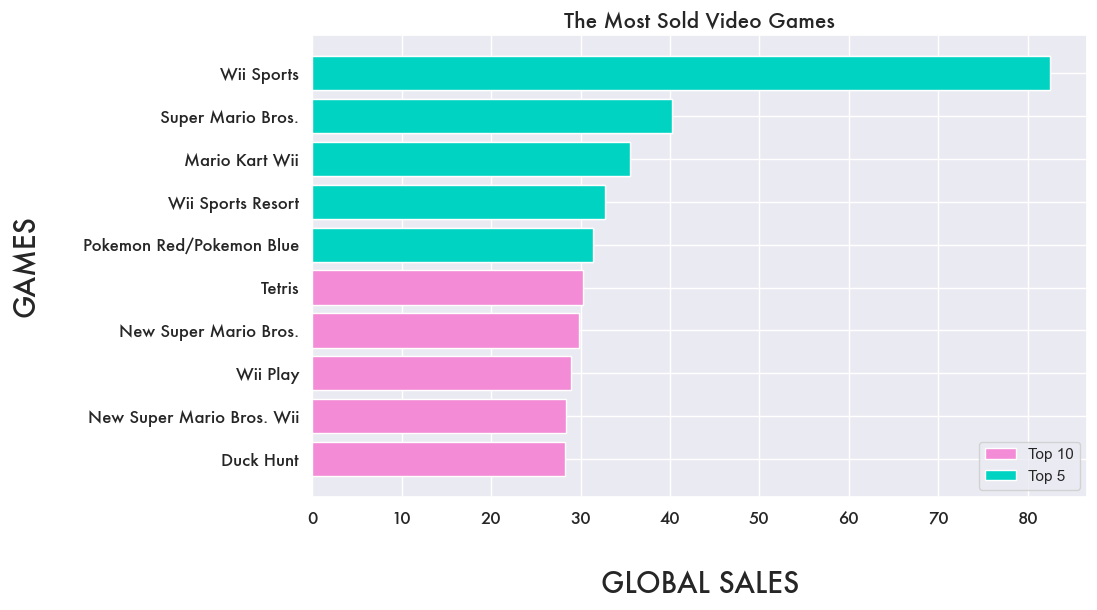

In [154]:
top_10 = vg.sort_values(by = "Global_Sales", ascending = False).head(10)
top_5 = vg.sort_values(by = "Global_Sales", ascending = False).head(5)

plt.figure(figsize = (10, 6))
plt.barh(top_10["Name"], top_10["Global_Sales"], color = "#F38BD6", label = "Top 10")
plt.barh(top_5["Name"], top_5["Global_Sales"], color = "#00D3C2", label = "Top 5")


plt.xlabel("GLOBAL SALES", labelpad = 30, font = "Futura", fontsize = 20)
plt.xticks(fontname = "Futura", fontsize = 12)

plt.ylabel("GAMES", labelpad = 30, font = "Futura", fontsize = 20)
plt.yticks(fontname = "Futura", fontsize = 12)

plt.title("The Most Sold Video Games", font = "Futura", fontsize = 15)
plt.legend()
plt.gca().invert_yaxis()   
plt.show()

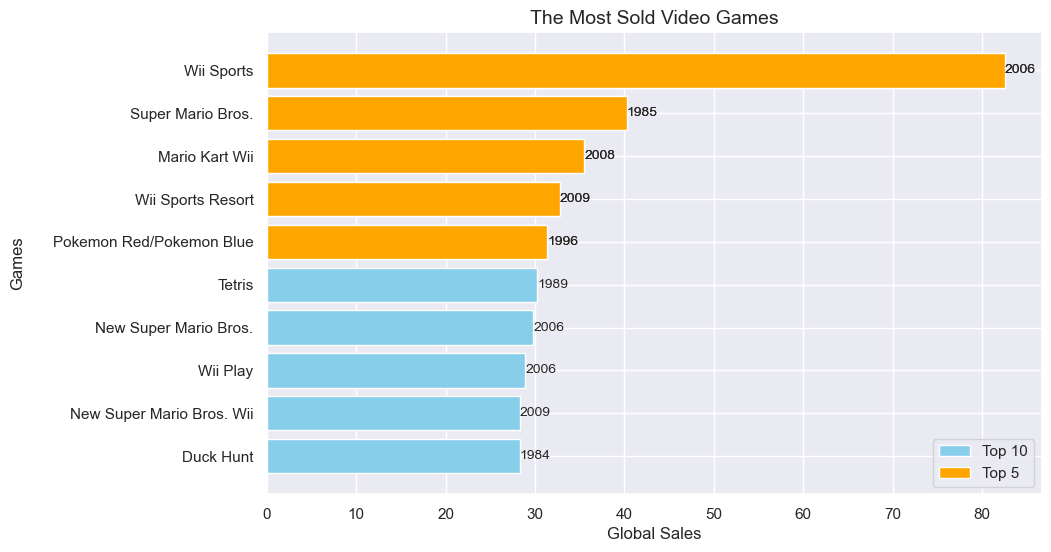

In [38]:
import matplotlib.pyplot as plt

# Assuming your dataset is in a DataFrame named "vg"
top_10 = vg.sort_values(by="Global_Sales", ascending=False).head(10)
top_5 = vg.sort_values(by="Global_Sales", ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_10["Name"], top_10["Global_Sales"], color="skyblue", label="Top 10")
plt.barh(top_5["Name"], top_5["Global_Sales"], color="orange", label="Top 5")

plt.xlabel("Global Sales", fontsize=12, fontname="Arial")  # Adjust fontsize and fontname
plt.ylabel("Games", fontsize=12, fontname="Arial", labelpad=20)  # Adjust fontsize, fontname, and labelpad
plt.title("The Most Sold Video Games", fontsize=14, fontname="Arial")  # Adjust fontsize and fontname
plt.legend()  # Add legend to display labels

# Annotate each bar with the corresponding year
for index, value in enumerate(top_10["Global_Sales"]):
    plt.text(value, index, str(top_10["Year_of_Release"].iloc[index]), fontsize=10, va='center')

for index, value in enumerate(top_5["Global_Sales"]):
    plt.text(value, index, str(top_5["Year_of_Release"].iloc[index]), fontsize=10, va='center')

plt.gca().invert_yaxis() 
plt.show()



#FD5551 RED
#8CB8EF BLUE
#F38BD6 PINK
#00D3C2 GREEN
#9F9D9E GRAY

, font = "Futura", fontsize = 15

['#FD5551', '#8CB8EF', '#F38BD6', '#00D3C2', '#9F9D9E']

### Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014? 

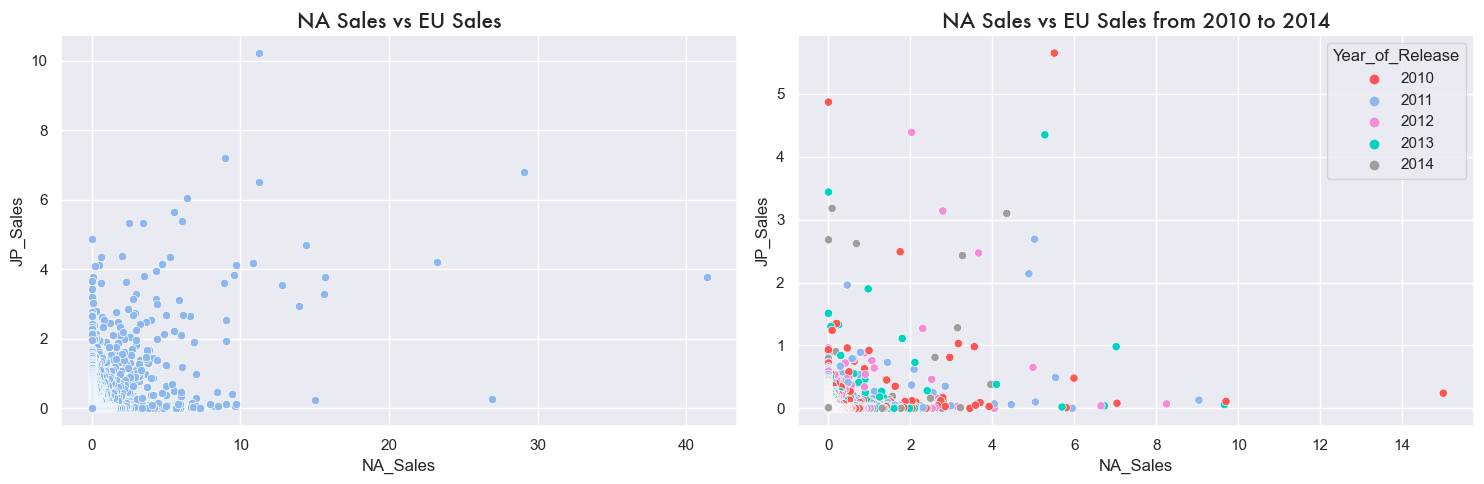

In [129]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

sns.scatterplot(data = vg, x = "NA_Sales", y = "JP_Sales", color = "#8CB8EF", ax = axes[0])
               #hue = "Year_of_Release", 
axes[0].set_title("NA Sales vs EU Sales", font = "Futura", fontsize = 15)


#vg_1014 = vg[(vg['Year_of_Release'] >= 2010) & (vg['Year_of_Release'] <= 2014)]
sns.scatterplot(data = vg[(vg['Year_of_Release'] >= 2010) & (vg['Year_of_Release'] <= 2014)], 
                x = "NA_Sales", y = "JP_Sales", ax = axes[1],
               hue = "Year_of_Release", palette = ["#FD5551", "#8CB8EF", "#F38BD6", "#00D3C2", "#9F9D9E"])
                
axes[1].set_title("NA Sales vs EU Sales from 2010 to 2014", font = "Futura", fontsize = 15)

plt.tight_layout()
plt.show()

In [116]:
pearson_corr = vg[["NA_Sales", "JP_Sales"]].corr(method = "pearson")

spearman_corr = vg[["NA_Sales", "JP_Sales"]].corr(method = "spearman")

print("Pearson correlation coefficient:")
print(pearson_corr)
print("\nSpearman correlation coefficient:")
print(spearman_corr)

Pearson correlation coefficient:
          NA_Sales  JP_Sales
NA_Sales  1.000000  0.451166
JP_Sales  0.451166  1.000000

Spearman correlation coefficient:
          NA_Sales  JP_Sales
NA_Sales  1.000000 -0.228913
JP_Sales -0.228913  1.000000


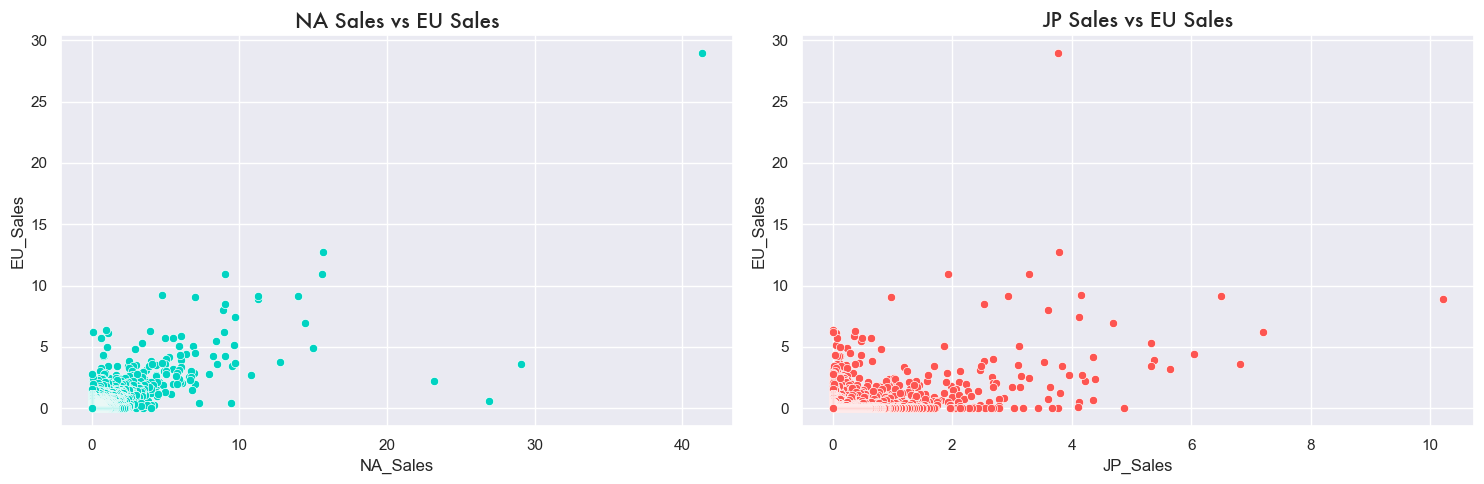

In [152]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

sns.scatterplot(data = vg, x = "NA_Sales", y = "EU_Sales", ax = axes[0], color = "#00D3C2")
axes[0].set_title("NA Sales vs EU Sales", font = "Futura", fontsize = 15)
 

sns.scatterplot(data = vg, x = "JP_Sales", y = "EU_Sales", ax = axes[1], color = "#FD5551")
axes[1].set_title("JP Sales vs EU Sales", font = "Futura", fontsize = 15)

  
plt.tight_layout()
plt.show()

In [117]:
pearson_corr = vg[["NA_Sales", "EU_Sales"]].corr(method = "pearson")

spearman_corr = vg[["NA_Sales", "EU_Sales"]].corr(method = "spearman")

print("Pearson correlation coefficient:")
print(pearson_corr)
print("\nSpearman correlation coefficient:")
print(spearman_corr)

Pearson correlation coefficient:
          NA_Sales  EU_Sales
NA_Sales  1.000000  0.766548
EU_Sales  0.766548  1.000000

Spearman correlation coefficient:
          NA_Sales  EU_Sales
NA_Sales   1.00000   0.68103
EU_Sales   0.68103   1.00000


In [118]:
pearson_corr = vg[["EU_Sales", "JP_Sales"]].corr(method = "pearson")

spearman_corr = vg[["EU_Sales", "JP_Sales"]].corr(method = "spearman")

print("Pearson correlation coefficient:")
print(pearson_corr)
print("\nSpearman correlation coefficient:")
print(spearman_corr)

Pearson correlation coefficient:
          EU_Sales  JP_Sales
EU_Sales  1.000000  0.435902
JP_Sales  0.435902  1.000000

Spearman correlation coefficient:
          EU_Sales  JP_Sales
EU_Sales  1.000000 -0.175105
JP_Sales -0.175105  1.000000


### What is the distribution of the most popular 4 game genres? 

there are two missing values in genre 


#FD5551 RED
#8CB8EF BLUE
#F38BD6 PINK
#00D3C2 GREEN
#9F9D9E GRAY

, font = "Futura", fontsize = 15

['#FD5551', '#8CB8EF', '#F38BD6', '#00D3C2', '#9F9D9E']

In [121]:
vg.dropna(subset = ["Genre"], inplace = True)

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


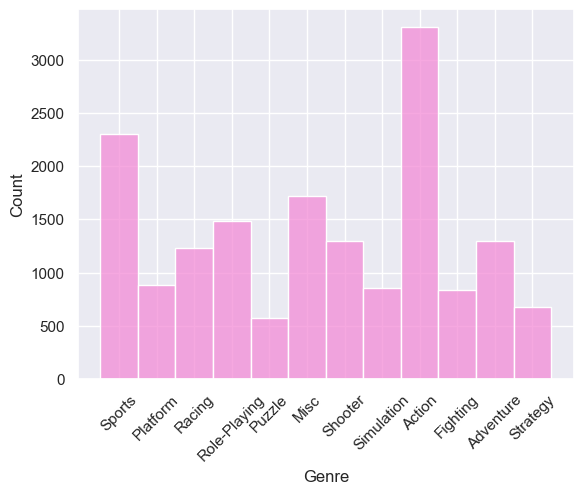

In [149]:
sns.histplot(vg["Genre"], color = "#F38BD6")
  
plt.xticks(rotation = 45);

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1800x900 with 0 Axes>

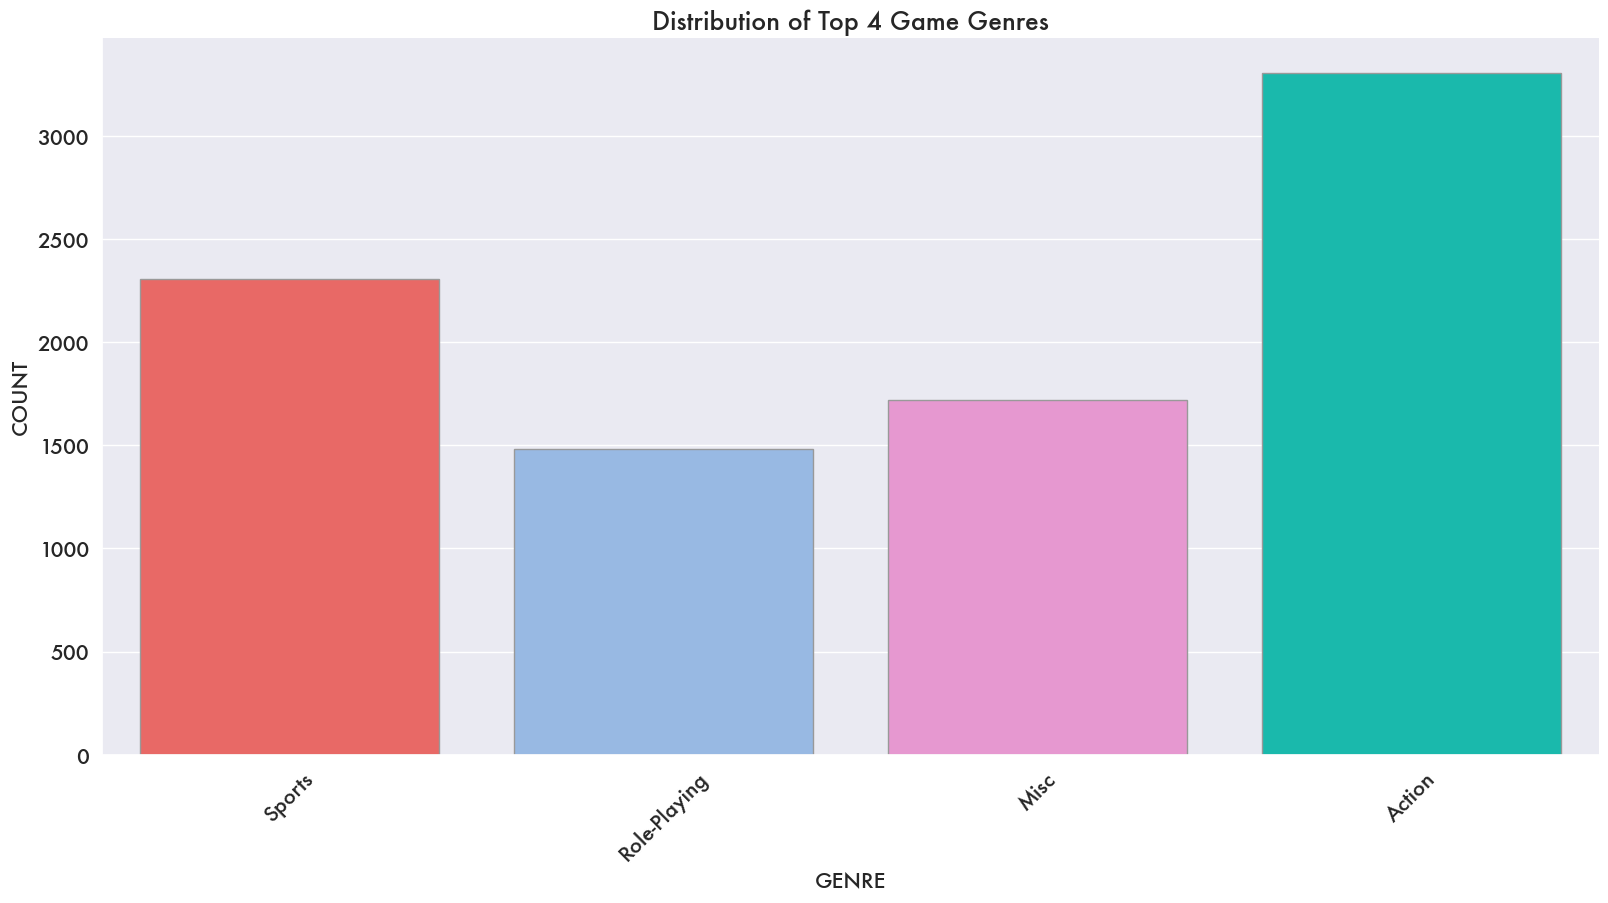

In [176]:
plt.figure(figsize = (18, 9))

sns.catplot(data = vg[vg["Genre"].isin(vg["Genre"].value_counts().head(4).index)], 
             x = "Genre", kind = "count", edgecolor = "0.6", height = 8, aspect = 2,
            palette = ["#FD5551", "#8CB8EF", "#F38BD6", "#00D3C2", "#9F9D9E"])


plt.title("Distribution of Top 4 Game Genres", font = "Futura", fontsize = 18)
plt.xlabel("GENRE", font = "Futura", fontsize = 15)
plt.ylabel("COUNT", font = "Futura", fontsize = 15)
plt.xticks(rotation = 45) 



plt.yticks(font = "Futura", fontsize = 15)
plt.xticks(rotation = 45, font = "Futura", fontsize = 15)
plt.show()

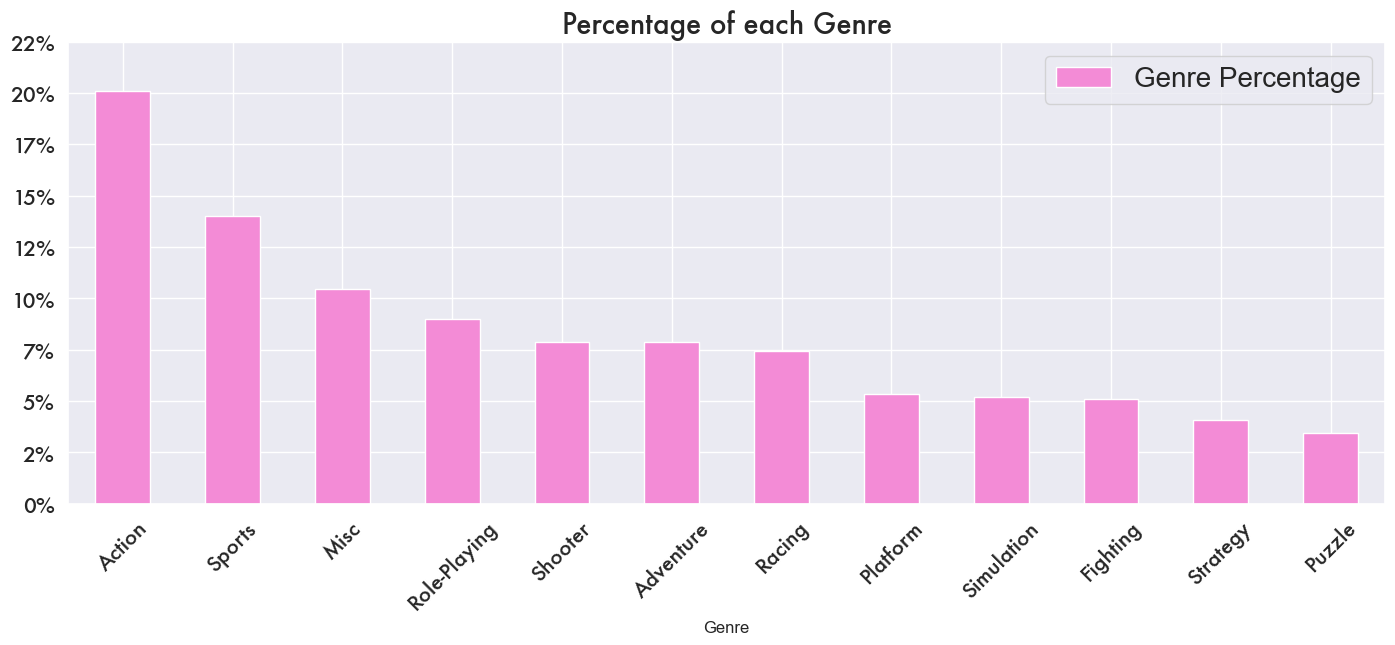

In [172]:
gen = vg["Genre"].value_counts()

gp = pd.DataFrame((gen / (len(vg["Genre"]))) * 100)

gp.columns = ["Genre Percentage"]

gp.plot(kind = "bar", color = "#F38BD6", figsize = (17,6))

plt.title("Percentage of each Genre", font = "Futura", fontsize = 20)

plt.yticks(ticks = plt.yticks()[0], labels=[f"{int(tick)}%" for tick in plt.yticks()[0]])
plt.xticks(rotation = 45, font = "Futura", fontsize = 15)
plt.yticks(font = "Futura", fontsize = 15)
plt.legend(fontsize = 20)

plt.show()

<Figure size 1000x600 with 0 Axes>

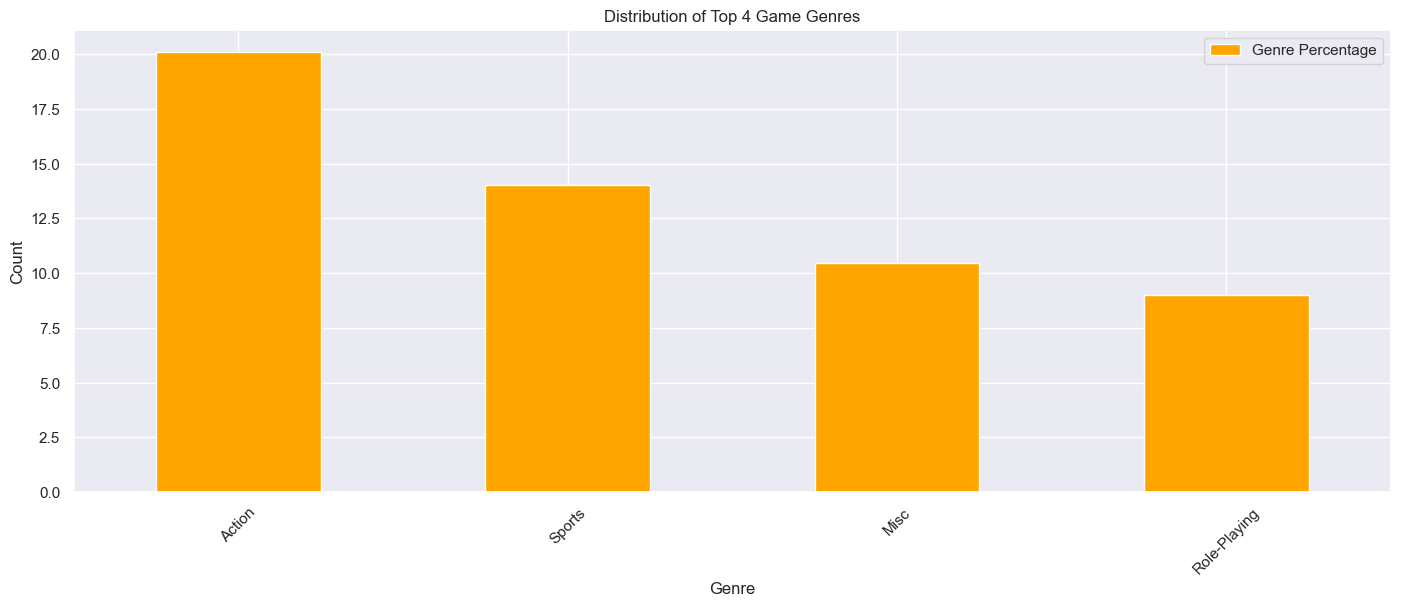

In [178]:
top_genres_data = gp[gp["Genre Percentage"].isin(gp["Genre Percentage"].value_counts().head(4).index)]

plt.figure(figsize = (10, 6))

top_genres_data.plot(kind = "bar", color = "orange", figsize = (17,6))

plt.title('Distribution of Top 4 Game Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

In [53]:
gp.tail(1)

Genre Percentage
Genre                   
Puzzle          3.458967

###  Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  


https://www.youtube.com/watch?v=nbqFQb3oIBo

https://www.youtube.com/watch?v=NzHaePgIToo

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

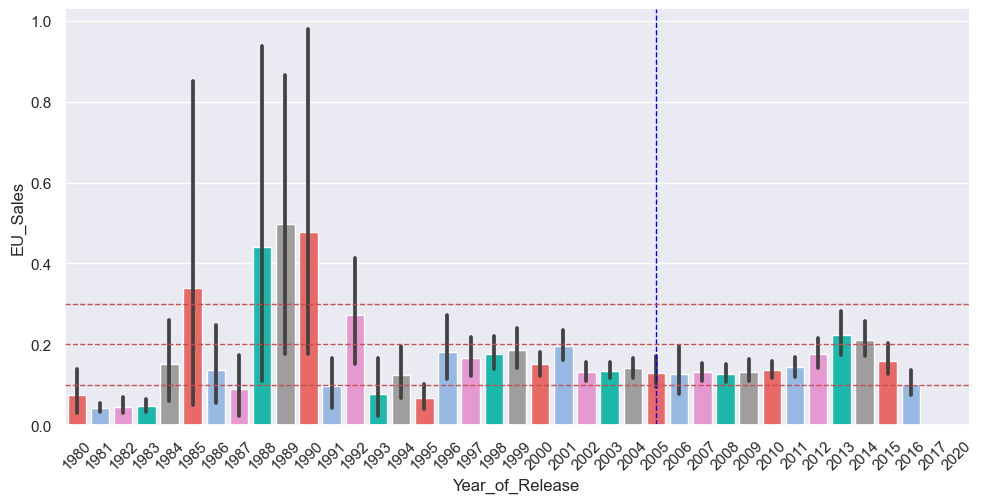

In [183]:
plt.figure(figsize=(20, 10))

sns.catplot(data = vg, x = "Year_of_Release", y = "EU_Sales", 
            kind = "bar", aspect = 2,
           palette = ["#FD5551", "#8CB8EF", "#F38BD6", "#00D3C2", "#9F9D9E"])

plt.axvline(x = 25, linewidth = 1, color = 'blue', linestyle = "--")

plt.axhline(y = 0.1, linewidth = 1, color = 'r', linestyle = "--")
plt.axhline(y = 0.2, linewidth = 1, color = 'r', linestyle = "--")
plt.axhline(y = 0.3, linewidth = 1, color = 'r', linestyle = "--")

plt.xticks(rotation = 45)

#plt.tight_layout(pad = 0.1)

plt.show()

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1438/782558890.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad = 0.1)


<Figure size 2000x1000 with 0 Axes>

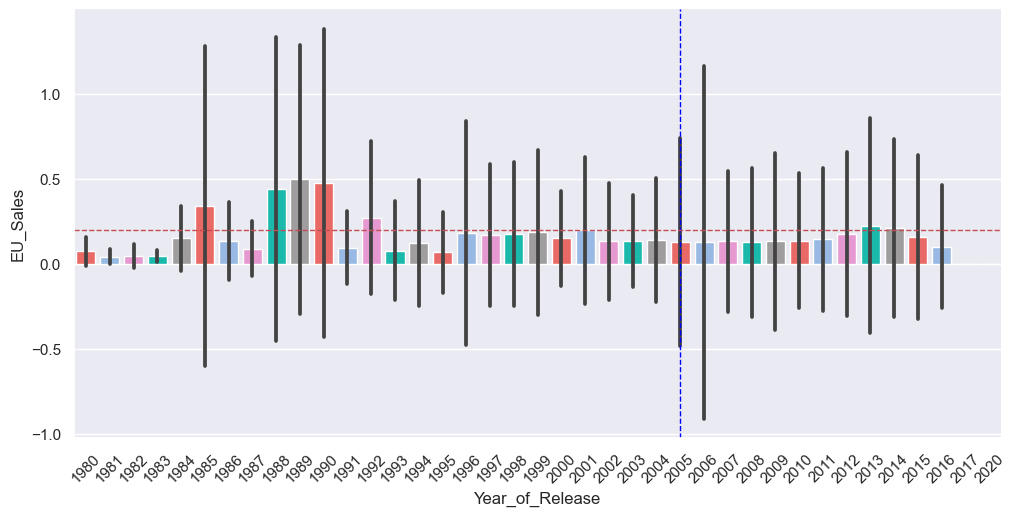

In [184]:
plt.figure(figsize=(20, 10))

sns.catplot(data = vg, x = "Year_of_Release", y = "EU_Sales", 
            kind = "bar", errorbar = "sd", aspect = 2,
           palette = ["#FD5551", "#8CB8EF", "#F38BD6", "#00D3C2", "#9F9D9E"])

plt.axvline(x = 25, linewidth = 1, color = 'blue', linestyle = "--")

plt.axhline(y = 0.2, linewidth = 1, color = 'r', linestyle = "--")

plt.xticks(rotation = 45)

plt.tight_layout(pad = 0.1)



### Let us check for the other sales

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

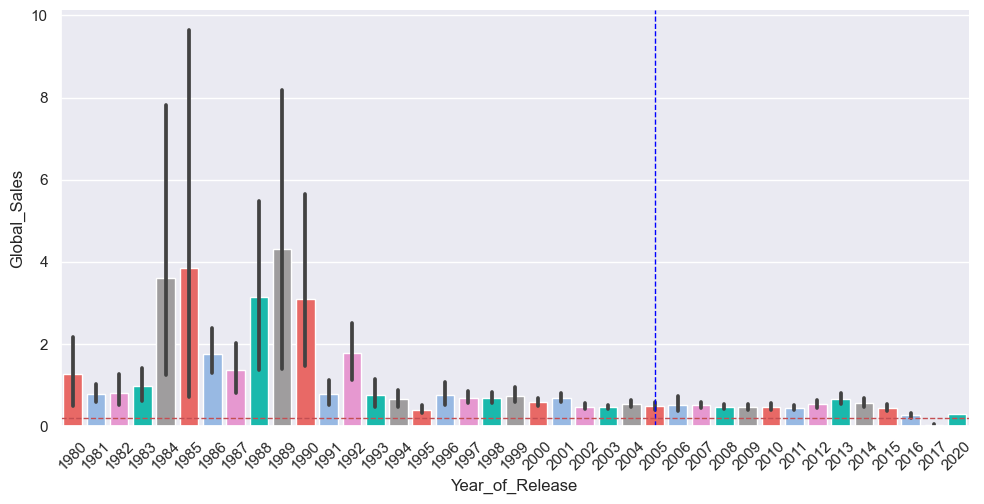

In [185]:
plt.figure(figsize=(20, 10))

sns.catplot(data = vg, x = "Year_of_Release", y = "Global_Sales", 
            kind = "bar", aspect = 2,
           palette = ["#FD5551", "#8CB8EF", "#F38BD6", "#00D3C2", "#9F9D9E"])

plt.axvline(x = 25, linewidth = 1, color = 'blue', linestyle = "--")

plt.axhline(y = 0.2, linewidth = 1, color = 'r', linestyle = "--")

plt.xticks(rotation = 45)

#plt.tight_layout(pad = 0.1)

plt.show()

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

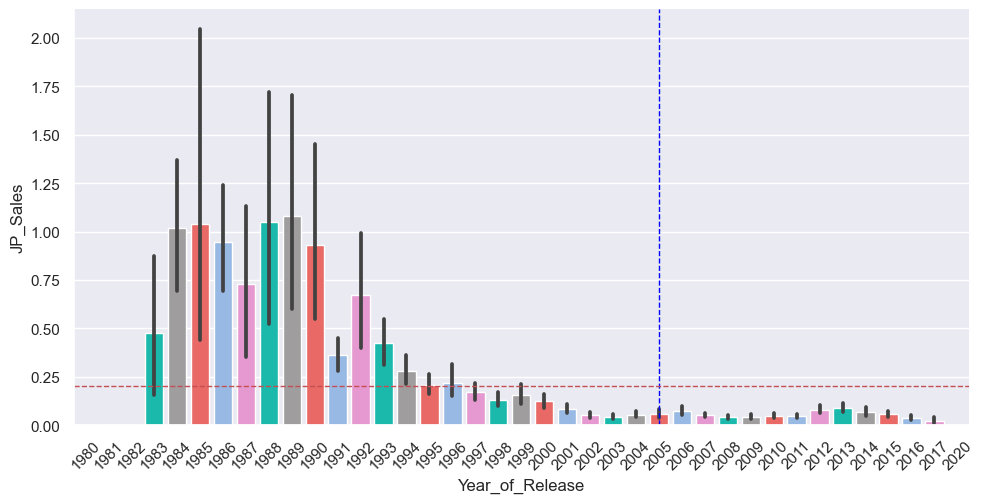

In [186]:
plt.figure(figsize=(20, 10))

sns.catplot(data = vg, x = "Year_of_Release", y = "JP_Sales", 
            kind = "bar", aspect = 2,
           palette = ["#FD5551", "#8CB8EF", "#F38BD6", "#00D3C2", "#9F9D9E"])

plt.axvline(x = 25, linewidth = 1, color = 'blue', linestyle = "--")

plt.axhline(y = 0.2, linewidth = 1, color = 'r', linestyle = "--")

plt.xticks(rotation = 45)

#plt.tight_layout(pad = 0.1)

plt.show()

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

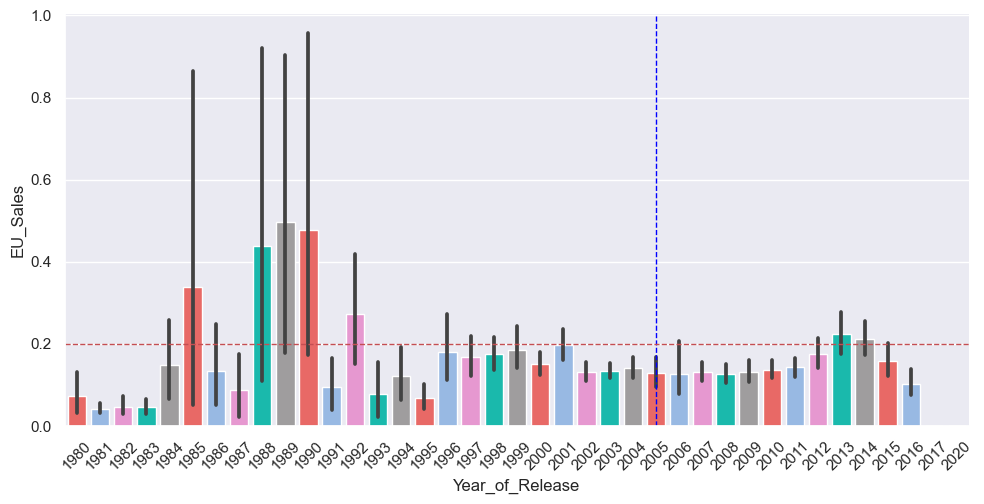

In [187]:
plt.figure(figsize=(20, 10))

sns.catplot(data = vg, x = "Year_of_Release", y = "EU_Sales", 
            kind = "bar", aspect = 2,
           palette = ["#FD5551", "#8CB8EF", "#F38BD6", "#00D3C2", "#9F9D9E"])

plt.axvline(x = 25, linewidth = 1, color = 'blue', linestyle = "--")

plt.axhline(y = 0.2, linewidth = 1, color = 'r', linestyle = "--")

plt.xticks(rotation = 45)

#plt.tight_layout(pad = 0.1)

plt.show()

aspect : scalar
    Aspect ratio of each facet, so that ``aspect * height`` gives the width
    of each facet in inches.    

### What are the 3 most common “developer” in the dataset? 

In [60]:
vg.tail(1)

Name Platform  Year_of_Release       Genre   Publisher  \
16718  Winning Post 8 2016      PSV             2016  Simulation  Tecmo Koei   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  ...  \
16718       0.0       0.0      0.01          0.0          0.01  ...   

       User_Count  Developer Rating  Developer_P Developer_PP  Developer_C  \
16718         NaN        NaN    NaN  Omega Force     TT Games  Omega Force   

      Developer_P_E Developer_PP_E Developer_OE  Developer_C_E  
16718          1042           1418         1680           1042  

[1 rows x 23 columns]

In [61]:
vg["Developer"].unique()

array(['Nintendo', nan, 'Good Science Studio', ..., 'Big Red Software',
       'Atomic Games', 'Interchannel-Holon'], dtype=object)

In [62]:
vg["Developer"].nunique()

1680

In [63]:
vg["Developer"].value_counts()

Developer
Ubisoft                      201
EA Sports                    169
EA Canada                    164
Konami                       158
Capcom                       137
                            ... 
Zombie                         1
Le Cortex                      1
Hypnos                         1
Genki, Kojima Productions      1
Interchannel-Holon             1
Name: count, Length: 1680, dtype: int64

In [31]:
vg["Developer_PP"].value_counts()

Developer_PP
EA Canada                    1369
Ubisoft                      1363
EA Sports                    1186
Capcom                       1118
Unknown                      1099
                             ... 
Zombie                          1
Le Cortex                       1
Hypnos                          1
Genki, Kojima Productions       1
Interchannel-Holon              1
Name: count, Length: 1681, dtype: int64

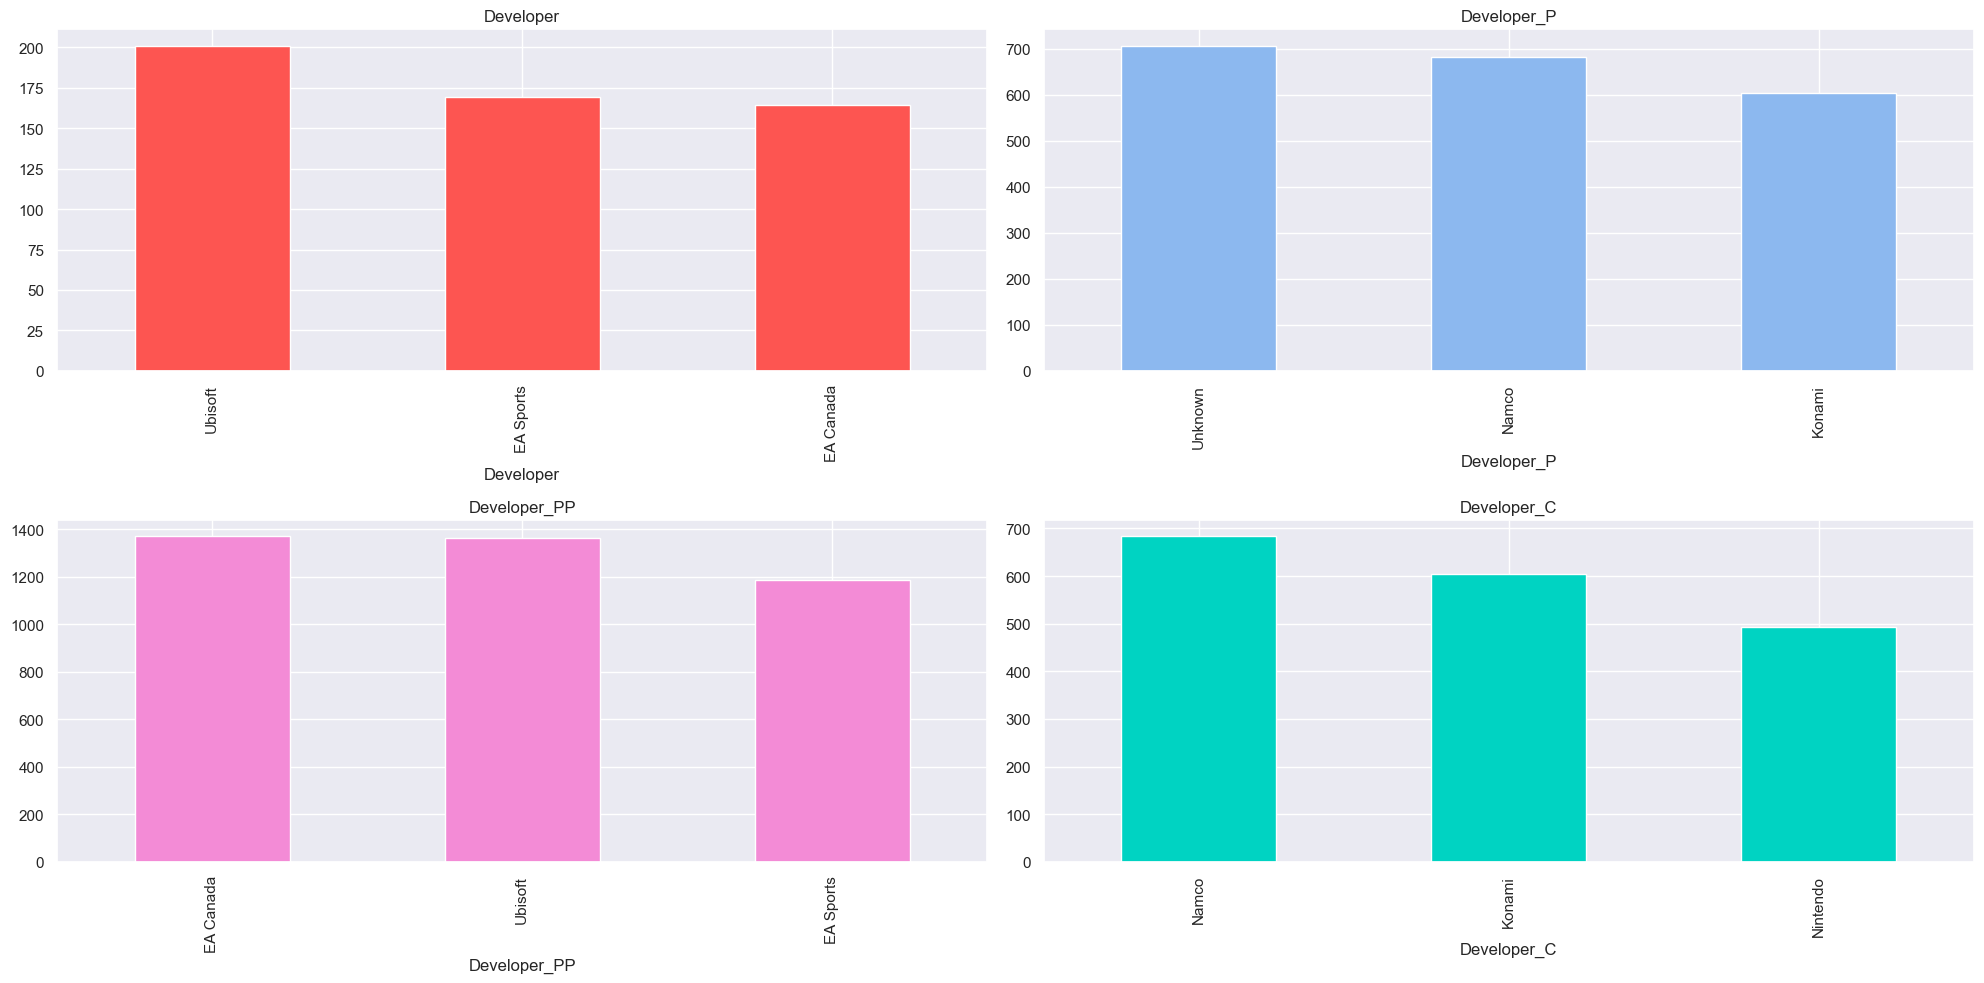

In [216]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Plot the first graphic
vg['Developer'].value_counts().head(3).plot(kind='bar', ax=axes[0, 0], color="#FD5551")
axes[0, 0].set_title('Developer')

# Plot the second graphic
vg['Developer_P'].value_counts().head(3).plot(kind='bar', ax=axes[0, 1], color="#8CB8EF")
axes[0, 1].set_title('Developer_P')

# Plot the third graphic
vg['Developer_PP'].value_counts().head(3).plot(kind='bar', ax=axes[1, 0], color="#F38BD6")
axes[1, 0].set_title('Developer_PP')

# Plot the fourth graphic
vg['Developer_C'].value_counts().head(3).plot(kind='bar', ax=axes[1, 1], color="#00D3C2")
axes[1, 1].set_title('Developer_C')

plt.tight_layout()
plt.show()


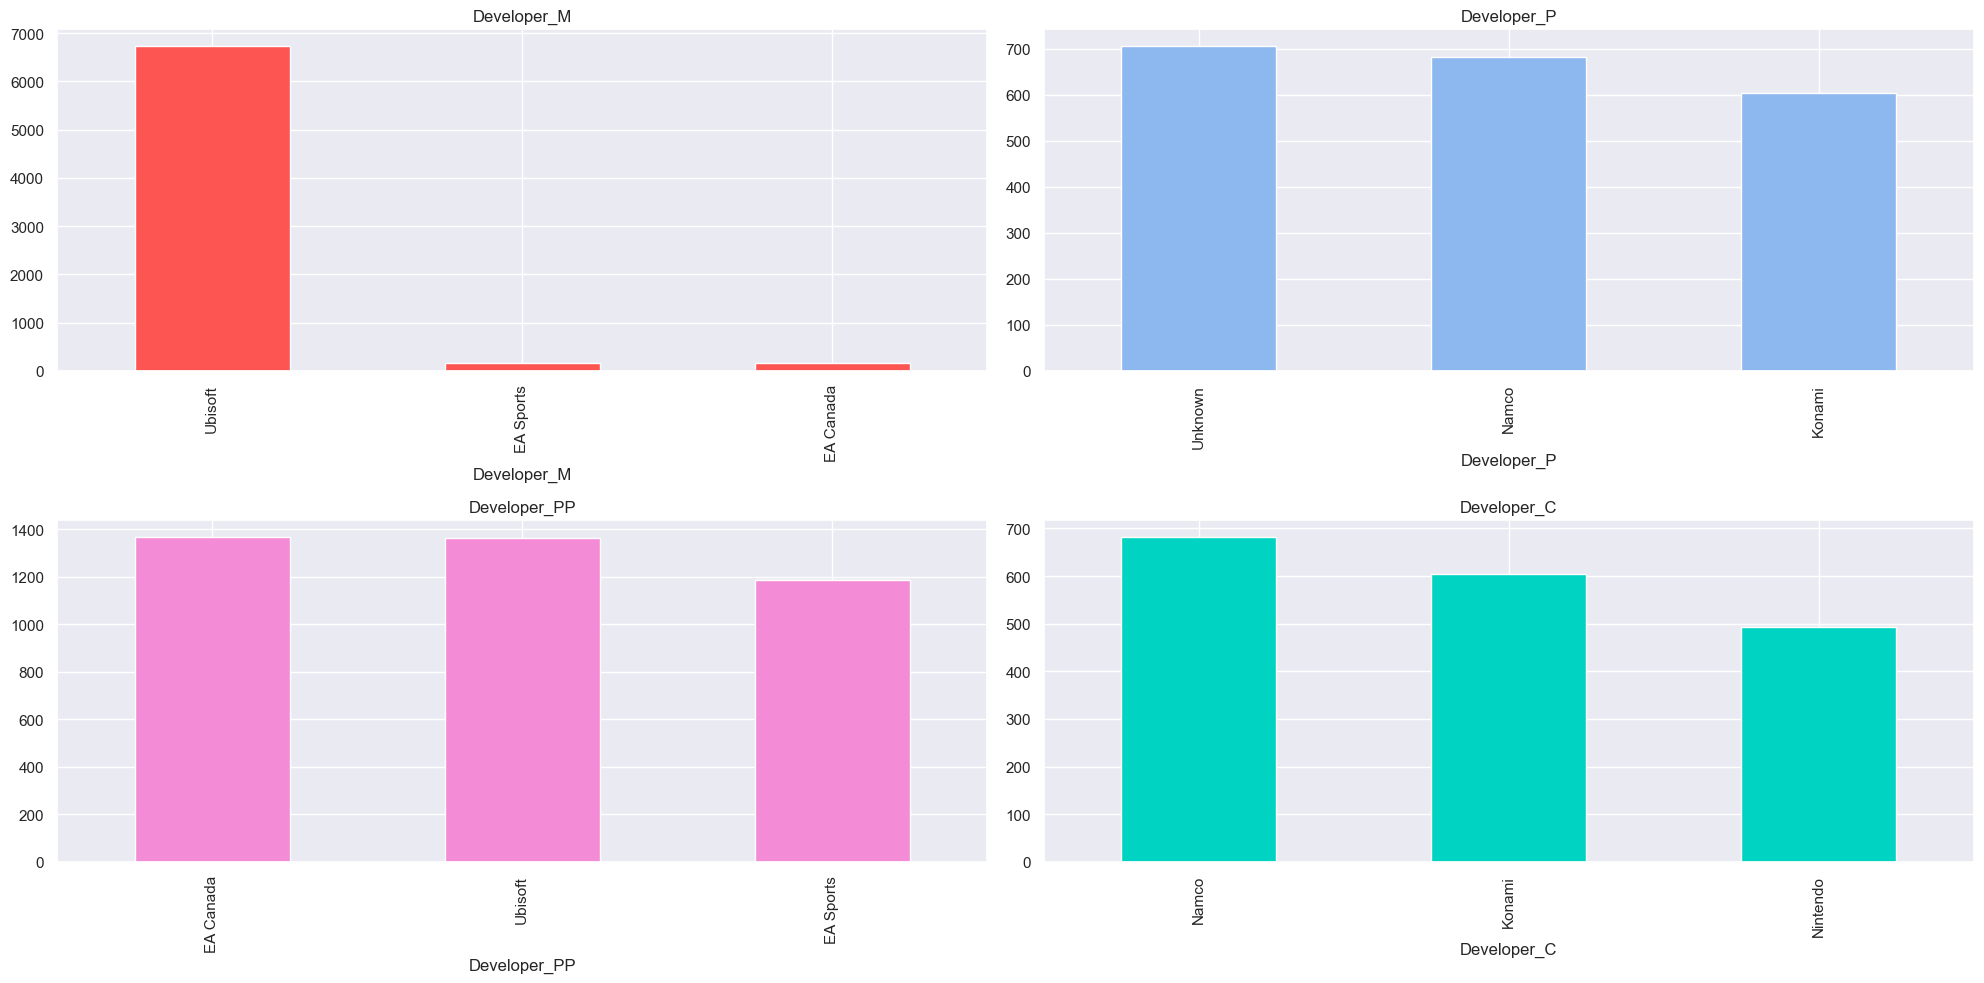

In [226]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Plot the first graphic
vg['Developer_M'].value_counts().head(3).plot(kind='bar', ax=axes[0, 0], color="#FD5551")
axes[0, 0].set_title('Developer_M')

# Plot the second graphic
vg['Developer_P'].value_counts().head(3).plot(kind='bar', ax=axes[0, 1], color="#8CB8EF")
axes[0, 1].set_title('Developer_P')

# Plot the third graphic
vg['Developer_PP'].value_counts().head(3).plot(kind='bar', ax=axes[1, 0], color="#F38BD6")
axes[1, 0].set_title('Developer_PP')

# Plot the fourth graphic
vg['Developer_C'].value_counts().head(3).plot(kind='bar', ax=axes[1, 1], color="#00D3C2")
axes[1, 1].set_title('Developer_C')

plt.tight_layout()
plt.show()


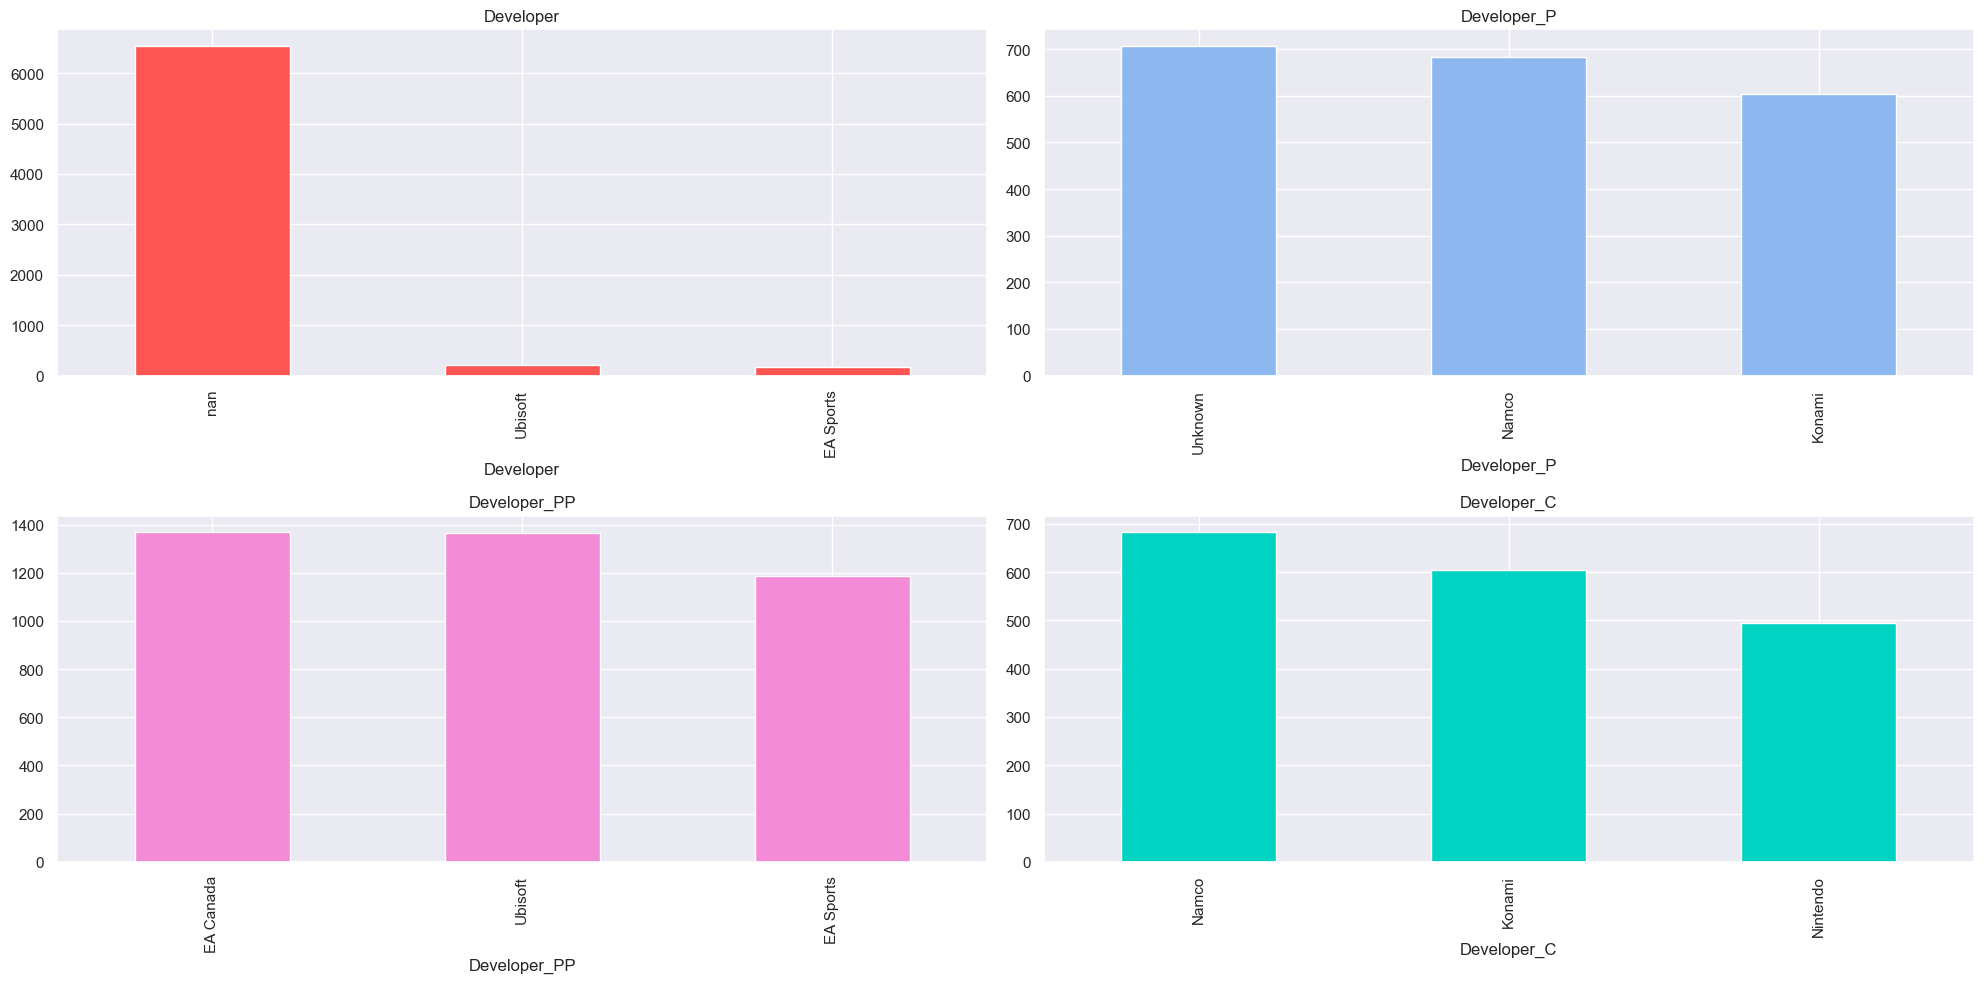

In [217]:
#vg['Developer'].value_counts(dropna=False).head(3).plot(kind='bar', ax=axes[0, 0], color='skyblue')
#axes[0, 0].set_title('Developer')


import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Plot the first graphic
vg['Developer'].value_counts(dropna=False).head(3).plot(kind='bar', ax=axes[0, 0], color= "#FD5551")
axes[0, 0].set_title('Developer')
#vg['Developer'].value_counts().head(3).plot(kind='bar', ax=axes[0, 0], color='skyblue')
#axes[0, 0].set_title('Developer')

# Plot the second graphic
vg['Developer_P'].value_counts().head(3).plot(kind='bar', ax=axes[0, 1], color="#8CB8EF")
axes[0, 1].set_title('Developer_P')

# Plot the third graphic
vg['Developer_PP'].value_counts().head(3).plot(kind='bar', ax=axes[1, 0], color="#F38BD6")
axes[1, 0].set_title('Developer_PP')

# Plot the fourth graphic
vg['Developer_C'].value_counts().head(3).plot(kind='bar', ax=axes[1, 1], color="#00D3C2")
axes[1, 1].set_title('Developer_C')

plt.tight_layout()
plt.show()

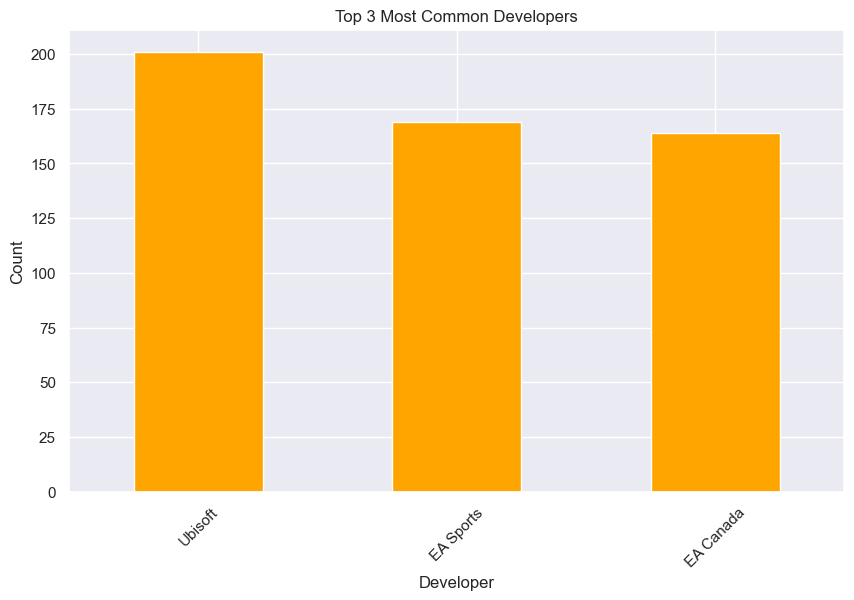

In [64]:
counts = vg['Developer'].value_counts().head(3)

plt.figure(figsize = (10, 6))
counts.plot(kind = "bar", color = "orange")

plt.xlabel('Developer', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Top 3 Most Common Developers')
plt.xticks(rotation = 45)  
plt.show()

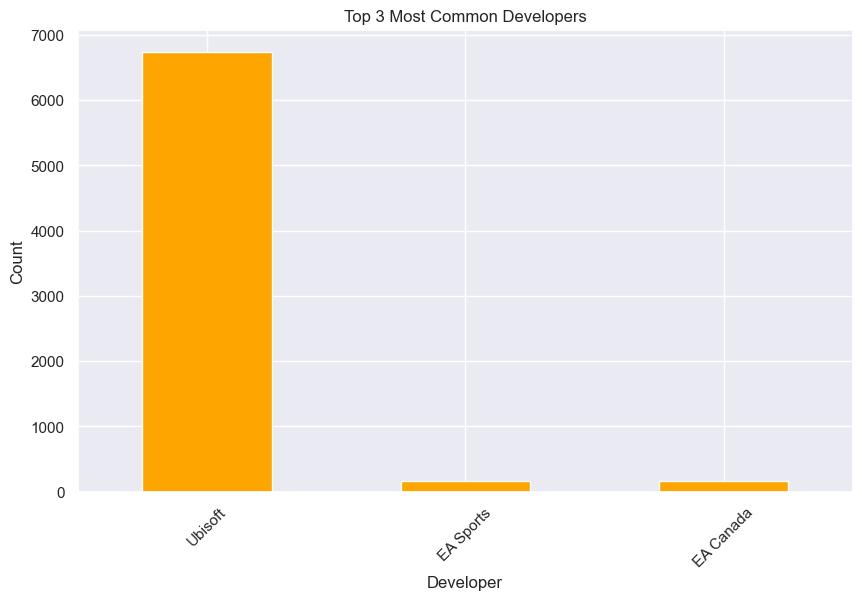

In [225]:
counts = vg['Developer_M'].value_counts().head(3)

plt.figure(figsize = (10, 6))
counts.plot(kind = "bar", color = "orange")

plt.xlabel('Developer', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Top 3 Most Common Developers')
plt.xticks(rotation = 45)  
plt.show()

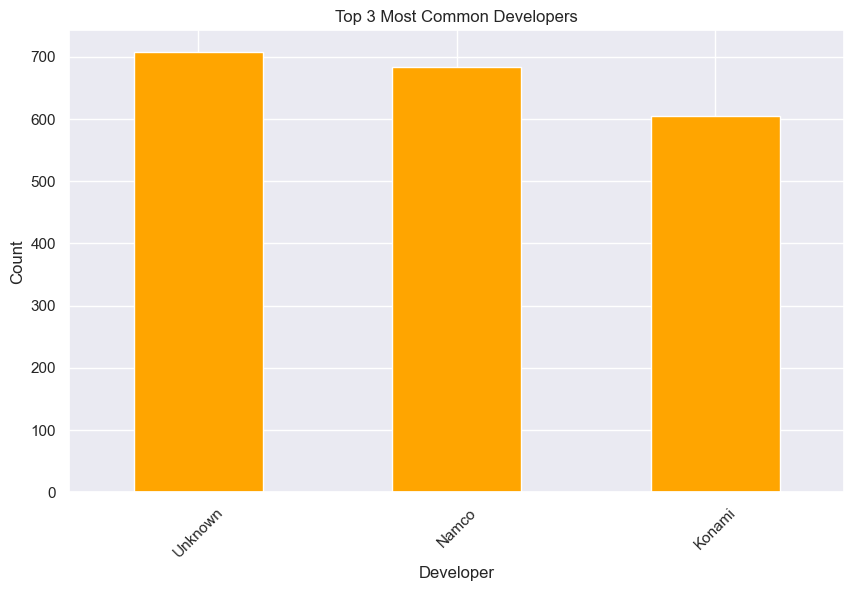

In [188]:
counts = vg['Developer_P'].value_counts().head(3)

plt.figure(figsize = (10, 6))
counts.plot(kind = "bar", color = "orange")

plt.xlabel('Developer', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Top 3 Most Common Developers')
plt.xticks(rotation = 45)  
plt.show()

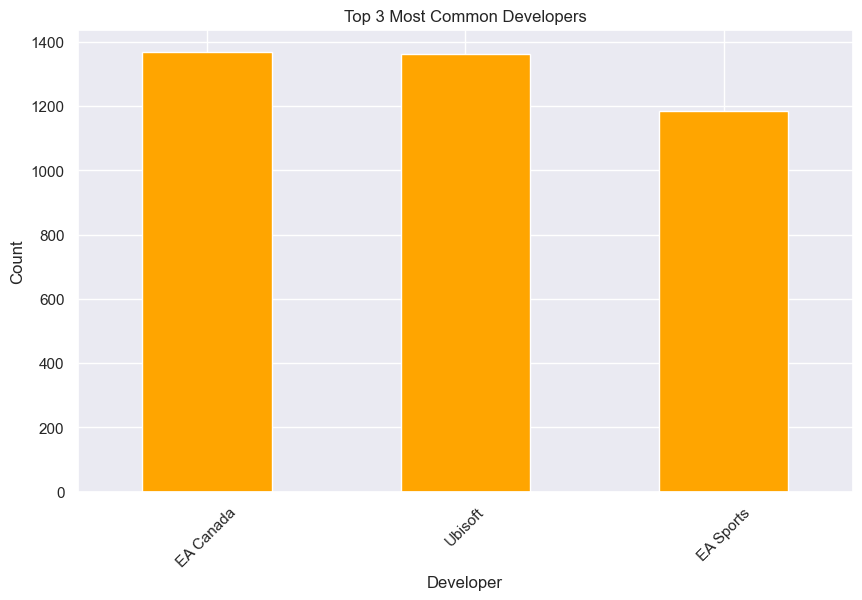

In [189]:
counts = vg['Developer_PP'].value_counts().head(3)

plt.figure(figsize = (10, 6))
counts.plot(kind = "bar", color = "orange")

plt.xlabel('Developer', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Top 3 Most Common Developers')
plt.xticks(rotation = 45)  
plt.show()

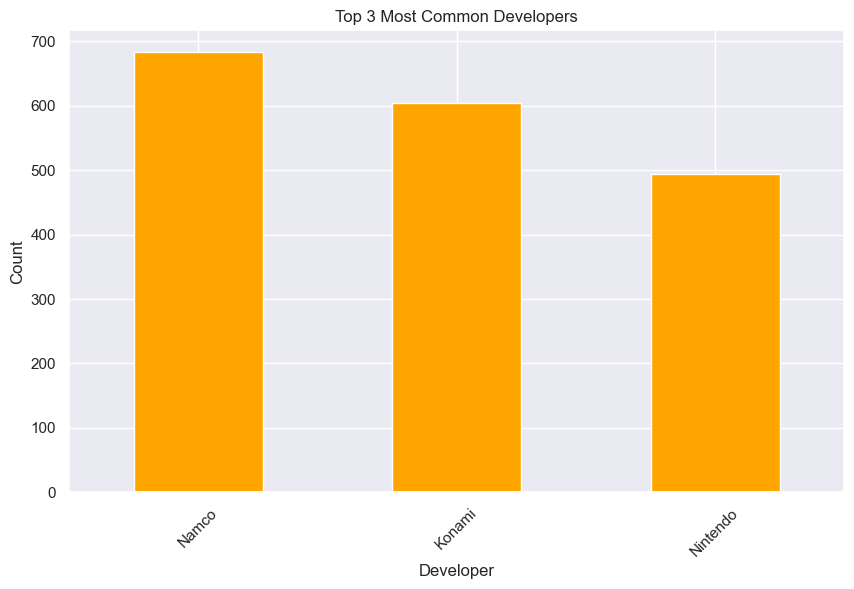

In [190]:
counts = vg['Developer_C'].value_counts().head(3)

plt.figure(figsize = (10, 6))
counts.plot(kind = "bar", color = "orange")

plt.xlabel('Developer', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Top 3 Most Common Developers')
plt.xticks(rotation = 45)  
plt.show()

In [191]:
vg.tail(1)

Name Platform  Year_of_Release       Genre   Publisher  \
16718  Winning Post 8 2016      PSV             2016  Simulation  Tecmo Koei   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  ...  \
16718       0.0       0.0      0.01          0.0          0.01  ...   

       User_Count  Developer Rating  Developer_P Developer_PP  Developer_C  \
16718         NaN        NaN    NaN  Omega Force     TT Games  Omega Force   

      Developer_P_E Developer_PP_E Developer_OE  Developer_C_E  
16718          1042           1418         1680           1042  

[1 rows x 23 columns]

In [196]:
d = pd.DataFrame(vg["Developer"].dropna())

In [197]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9907 entries, 0 to 16710
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Developer  9907 non-null   object
dtypes: object(1)
memory usage: 154.8+ KB


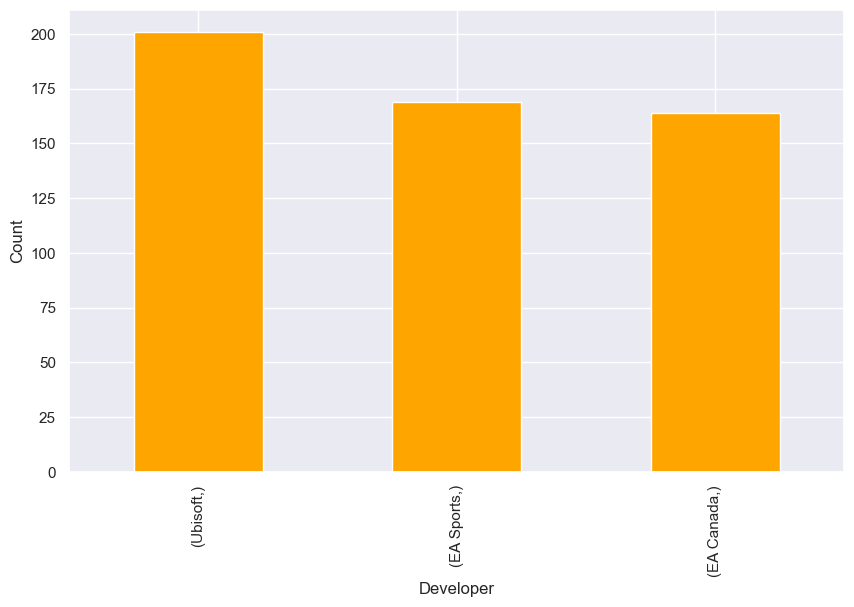

In [199]:
counts = d.value_counts().head(3)
plt.figure(figsize=(10, 6))
counts.plot(kind="bar", color="orange")
plt.xlabel('Developer', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


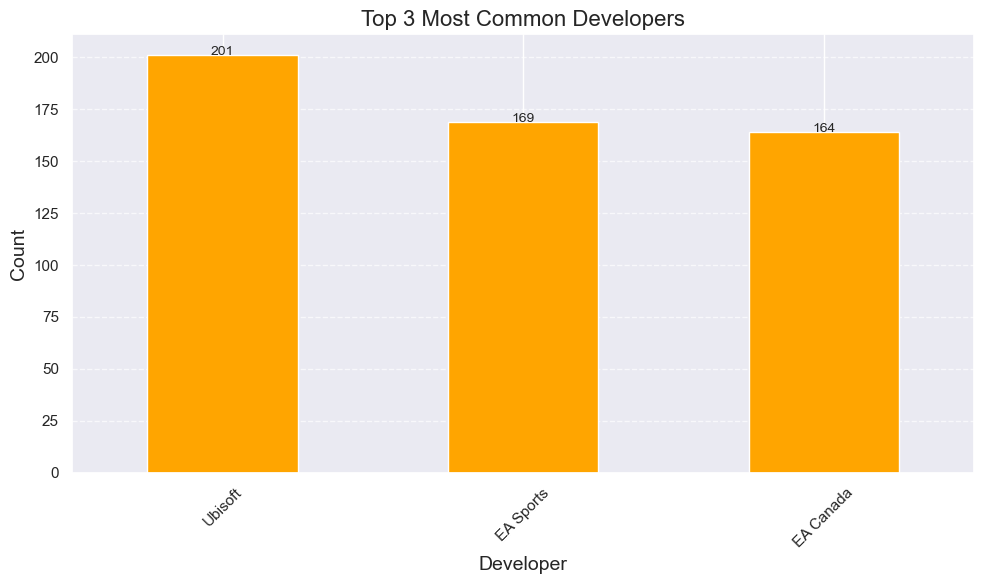

In [65]:
counts = vg['Developer'].value_counts().head(3)

plt.figure(figsize=(10, 6))
counts.plot(kind="bar", color="orange")

plt.xlabel('Developer', fontsize=14)  # Increase font size for better readability
plt.ylabel('Count', fontsize=14)
plt.title('Top 3 Most Common Developers', fontsize=16)  # Increase font size for the title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better interpretation

# Add data labels to the top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', fontsize=10)  

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


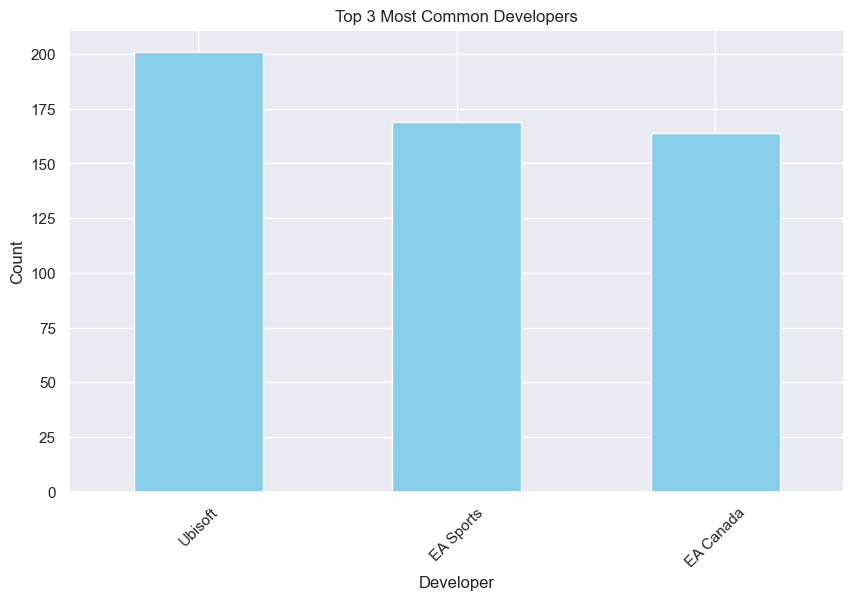

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Count occurrences of each category in the "Developer" column
developer_counts = vg['Developer'].value_counts()

# Step 2: Select the top three categories
top_3_developers = developer_counts.head(3)

# Step 3: Plot the counts of these categories
plt.figure(figsize=(10, 6))
top_3_developers.plot(kind='bar', color='skyblue')
plt.xlabel('Developer', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 3 Most Common Developers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [67]:
vg.tail(1)

Name Platform  Year_of_Release       Genre   Publisher  \
16718  Winning Post 8 2016      PSV             2016  Simulation  Tecmo Koei   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  ...  \
16718       0.0       0.0      0.01          0.0          0.01  ...   

       User_Count  Developer Rating  Developer_P Developer_PP  Developer_C  \
16718         NaN        NaN    NaN  Omega Force     TT Games  Omega Force   

      Developer_P_E Developer_PP_E Developer_OE  Developer_C_E  
16718          1042           1418         1680           1042  

[1 rows x 23 columns]

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

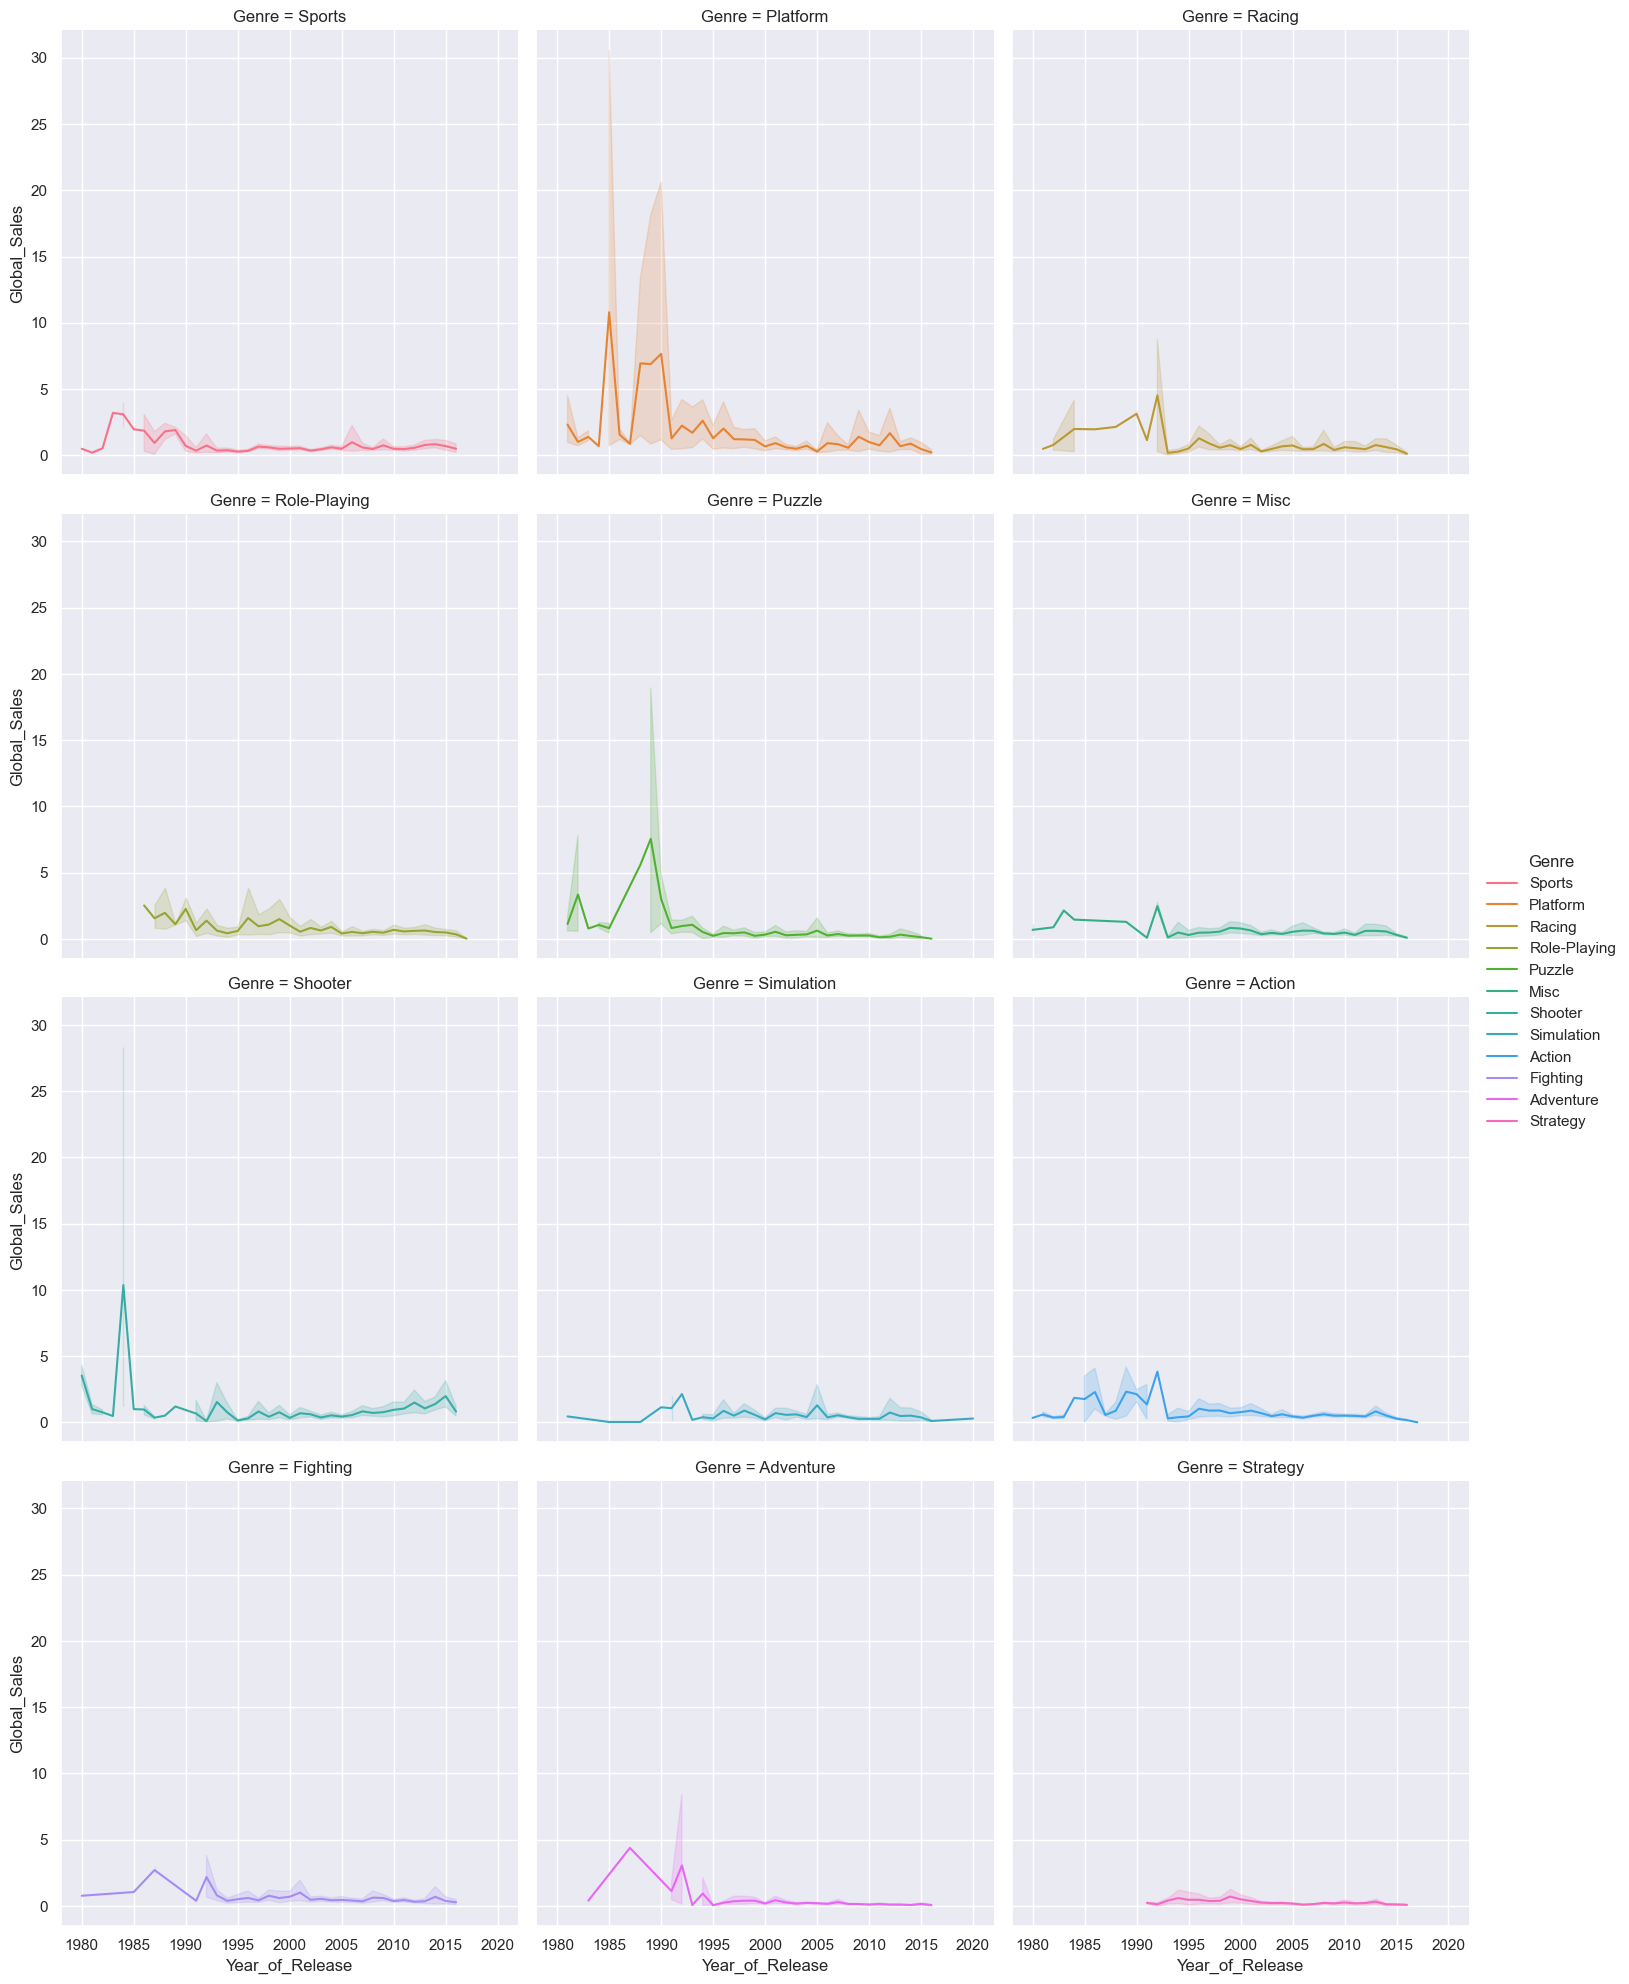

In [68]:
import seaborn as sns

sns.relplot(data=vg, x="Year_of_Release", y="Global_Sales", hue="Genre", col="Genre", col_wrap=3, kind="line")


In [229]:
vg["Platform"].nunique()

31

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


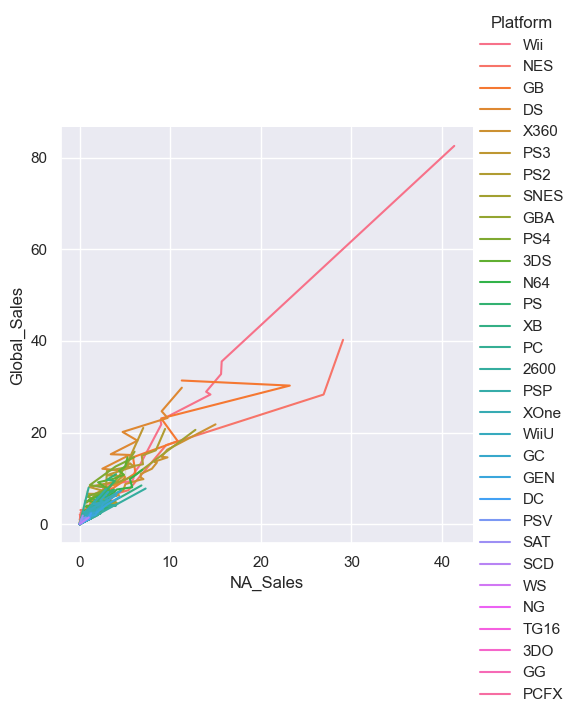

In [230]:
import seaborn as sns

# Assuming vg is your DataFrame

sns.relplot(
    data=vg, kind="line",
    x="NA_Sales", y="Global_Sales", hue="Platform",
    sort=False
)


/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


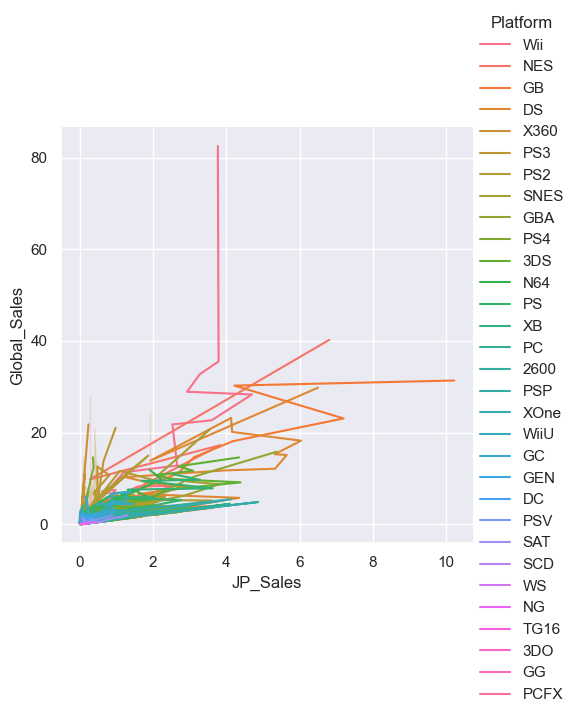

In [231]:
import seaborn as sns

# Assuming vg is your DataFrame

sns.relplot(
    data=vg, kind="line",
    x="JP_Sales", y="Global_Sales", hue="Platform",
    sort=False
)


/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


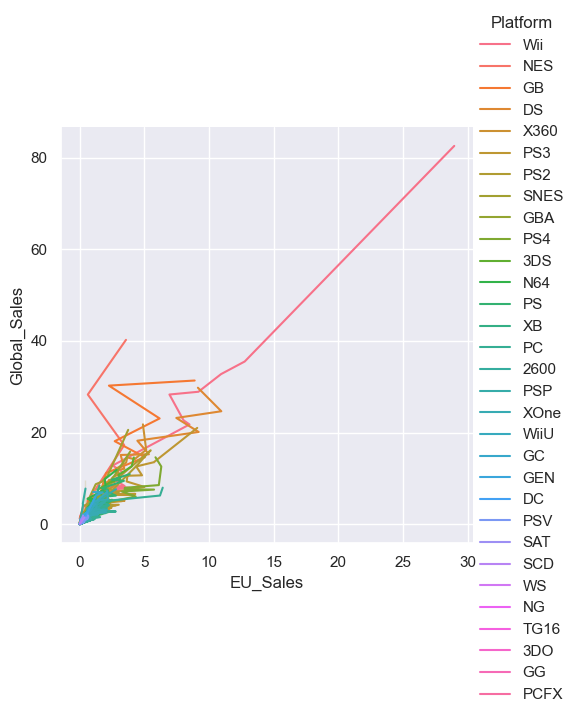

In [232]:
import seaborn as sns

# Assuming vg is your DataFrame

sns.relplot(
    data=vg, kind="line",
    x="EU_Sales", y="Global_Sales", hue="Platform",
    sort=False
)


/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


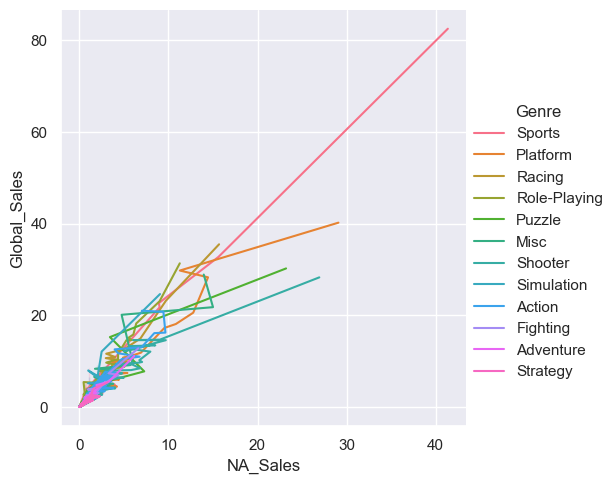

In [69]:
import seaborn as sns

# Assuming vg is your DataFrame

sns.relplot(
    data=vg, kind="line",
    x="NA_Sales", y="Global_Sales", hue="Genre",
    sort=False
)


/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


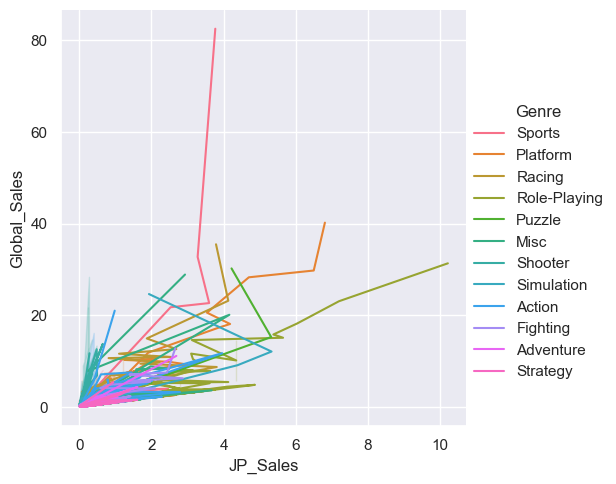

In [227]:
import seaborn as sns

# Assuming vg is your DataFrame

sns.relplot(
    data=vg, kind="line",
    x="JP_Sales", y="Global_Sales", hue="Genre",
    sort=False
)


/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


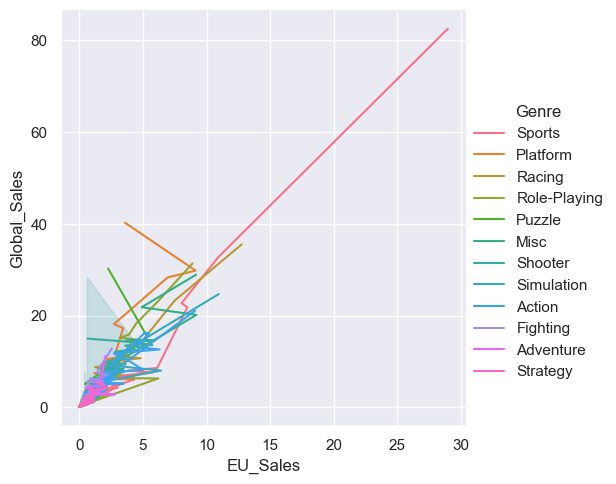

In [228]:
import seaborn as sns

# Assuming vg is your DataFrame

sns.relplot(
    data=vg, kind="line",
    x="EU_Sales", y="Global_Sales", hue="Genre",
    sort=False
)


Reference list
IBM (2023). What is Exploratory Data Analysis? | IBM. [online] www.ibm.com. Available at: https://www.ibm.com/topics/exploratory-data-analysis#:~:text=Exploratory%20data%20analysis%20(EDA)%20is.
IMDb (2018). Advanced search. [online] IMDb. Available at: https://www.imdb.com/search/title/?title_type=video_game&release_date=2018-01-01 [Accessed 1 Apr. 2024].
